## Start by copying this into your Google Drive!!

Maastricht_University_logo.svg

# Information Retrieval and Text Mining - Tutorial Measuring Quality
Author: Jan Scholtes
Version 2025-2026




Welcome to the tutorial on quantitatively measuring quality in Information Retrieval and Text Mining .

Precision, Recall, F1, and 11-points precision-recall graphs are the most used quantitative measurements in information retrieval for classification problems. In this tutorial we will discuss these using data sets from the Text Retrieval Evaluation Conference (TREC) organized by the US National Institute of Standards (NIST).

The Kappa-Cohen distance is used mostly to measure (dis)agreement between judges on annotated data sets. This is important to identify misunderstandings and forms of human bias on (human) annotated data sets.  

For Topic Modeling and Clustering, we use the RAND index (related to Precision and REcall) and measurements such as the PMI (Pointwise Mutual Information).

Sumaries use the ROUGE measurement. There are a variety of other measurements used in NLP. We will discuss most of them in the course on ANLP.

In this tutorial we will first focus on IR and TM measurements. Mostly Precision, Recall, F1 and 11 points PR. Next, we will discuss other metrics such as Perplexity, ROUGE, and various metrics from the RAGAS framework. 

You can also find more background information in the lecture slides and here: Christopher D. Manning, Prabhakar Raghavan and Hinrich Schütze, Introduction to Information Retrieval, Chapter 8, Evaluation in information retrieval, Cambridge University Press. 2008.

In [3]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from tqdm import tqdm
import numpy as np


Let's start defining a number of data structures as used in TREC:

- Labels: the list of relevant document ID's for a particular search or classification operation.

- Retrieved: the list with document ID's from all retrieved documents. This includes both relevant and non-relevant documents. Retrieved documents are often ranked on relevance.

In [4]:
# Actual Value
labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
# Predicted Value
predictions = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

In Information Retrieval, the ranking of documents should also be included in the measurement of precision and recall. But let's first look at the unranked situation.

We define the following:



*   True Positive (TP) = number of relevant items identified as relevant
*   True Negative (TN) = number of non-relevant items identified as non-relevant
*   False Positive (FP) = number of non-relevant items identied as relevant
*   False Negative (FN) = number of relevant items identified as non-relevant

As we discussed in the lecture, precision, recall, F1 and Accuracy can be defined as follows:

$$Precision = \frac{TP}{TP+FP}\quad Recall = \frac{TP}{(TP+FN)} \quad Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \quad F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$$

using the variables `tn`, `fp`, `fn`, `tp` above.

In [14]:
TP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
       TP+=1
print("True Positive: ", TP) # 3
FP = 0
for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
       FP+=1
print("False Positive: ", FP) # 3
TN = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 0:
       TN+=1
print("True Negative: ", TN) # 0
FN = 0
for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
       FN+=1
print("False Negative: ", FN) # 4

True Positive:  2
False Positive:  8
True Negative:  0
False Negative:  0


We can also measure the number of correct predictions (CP) and Incorrect Predictions (IP):

In [15]:
CP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i]:
       CP+=1
print("Correct Prediction: ", CP) # 3
print(CP == TP + TN) # True
ICP = 0
for i in range(0,len(labels)):
    if labels[i] != predictions[i]:
       ICP+=1
print("Incorrect Prediction: ", ICP)# 7
print(ICP == FP + FN) # True

Correct Prediction:  2
True
Incorrect Prediction:  8
True


Which will allow us to calculate the Accuracy.

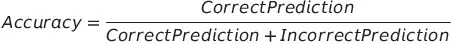

and

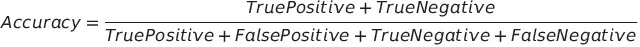

In [16]:
accuracy = (TP + TN)/(TP + FP + TN + FN)
print(accuracy*100)

20.0


Using the Sklearn libraries, we can make similar calculations.

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels , predictions)*100)

20.0


As we have seen in the lectures, with unbalanced data sets (small number of relevant items in a large set of unrelevant ones, which is often the case in information retrieval), accuracy can be misleading.

In [18]:
labels = [0,0,0,0,1,0,0,1,0,0]
predictions = [0 ,0 ,0 ,0 ,0 , 0 ,0 ,0 ,0 ,0]
print(accuracy_score(labels , predictions)*100) # 80

80.0


Let's recalculate TP, TN, FP and FN

In [19]:
TP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
       TP+=1
print("True Positive: ", TP) # 3
FP = 0
for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
       FP+=1
print("False Positive: ", FP) # 3
TN = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 0:
       TN+=1
print("True Negative: ", TN) # 0
FN = 0
for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
       FN+=1
print("False Negative: ", FN) # 4

True Positive:  0
False Positive:  0
True Negative:  8
False Negative:  2


Looking at Recall gives us and Precision cannot be calculated (div 0):

In [20]:
recall = (TP)/(TP+FN)
print(recall*100)

0.0


But a high recall may also be misleading as precision is reverse-proportional.

In [21]:
labels = [0,0,0,0,1,0,0,1,0,0]
predictions = [1,1,1,1,1,1,1,1,1,1]
print(accuracy_score(labels , predictions)*100)
print(recall_score(labels , predictions)*100)

20.0
100.0


# Exersize 1:

a. Why is accuracy not a good measurement in information retrieval and text-mining?

b. Why do we need to look at the combination of precision and recall?

c.	Why is the 11-point precision-recall graph the best method. Explain how it works with an example.


## YOUR ANSWER HERE

This is why we also look at F1 scores and 11 points precision recall graphs. These provide a more balanced view.

In [22]:
from sklearn.metrics import f1_score
print(f1_score(labels, predictions))

0.3333333333333333


# Exersize 2:

1. Can you calculate the F2 score or the F0.5 score?

2. Which one prevails recall and which one prevails precision

3. What would a lawyer be mostly interested in: F1, F2 or F0.5?

4. How about a consumer using Google to find a good hotel in Maastricht?



## YOUR ANSWER HERE

How about Confusion Matrices? A confusion matrix is a matrix to represent the number of True Positives, False Positives, True Negatives, and False Negatives

In [23]:
# Actual Value
labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
# Predicted Value
predictions = [0, 0, 1, 1, 1, 0, 1, 0, 1, 0]

In [24]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(labels, predictions)
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]

Plot as bar graph

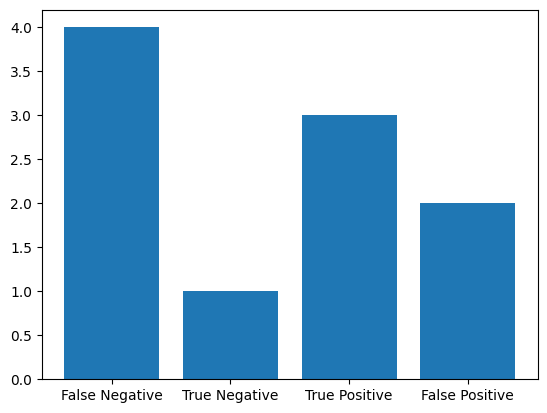

In [25]:
import matplotlib.pyplot as plt
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

Plot as heatmap

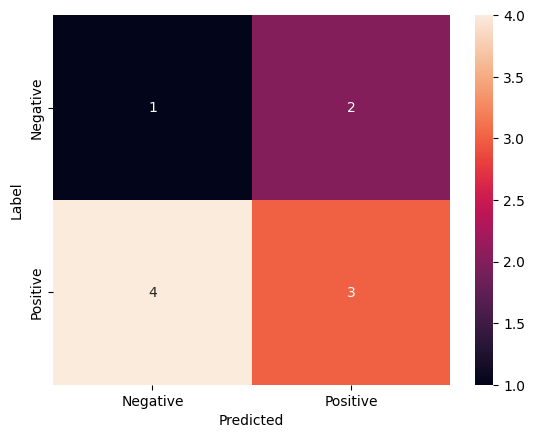

In [26]:
import seaborn as sns
sns.heatmap(confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'])
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

Display as Matrix

In [27]:
import pandas as pd
data = {'Labels' : labels, 'Predictions': predictions}
df = pd.DataFrame(data, columns=['Labels','Predictions'])
confusion_matrix = pd.crosstab(df['Labels'], df['Predictions'], rownames=['Labels'], colnames=['Predictions'])
print (confusion_matrix)

Predictions  0  1
Labels           
0            1  2
1            4  3


Or display as Classification Report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(labels,predictions))

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.60      0.43      0.50         7

    accuracy                           0.40        10
   macro avg       0.40      0.38      0.38        10
weighted avg       0.48      0.40      0.42        10



or a precision recall graph:

In [29]:
from sklearn.metrics import precision_recall_curve
print(precision_recall_curve(labels,predictions))

(array([0.7, 0.6, 1. ]), array([1.        , 0.42857143, 0.        ]), array([0, 1]))


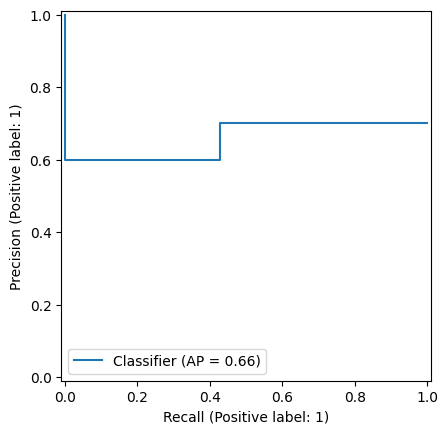

In [30]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
PrecisionRecallDisplay.from_predictions(labels, predictions)

Now this is a pretty bad score. For better classifiers, the graph should be as much as possible in the upper right corner and above 80% precision and recall for all data points.

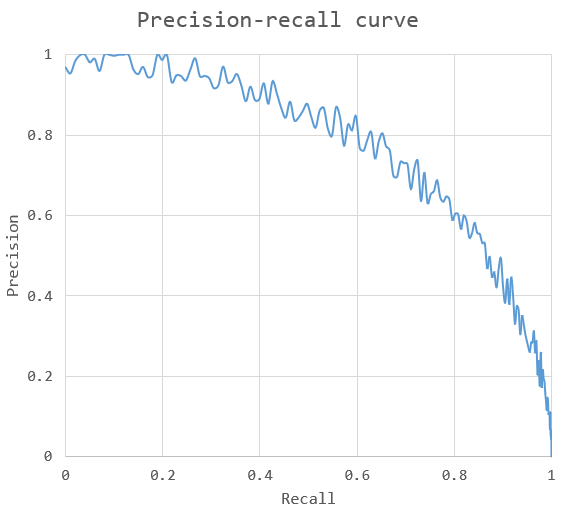

# The Kappa Cohen Distance

Cohen's kappa coefficient (κ, lowercase Greek kappa) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.

Although there is controversie about this measure, it is a good first start. If the Kappa-Cohen distance is not good, you should be concerned. If it is good, there arfe more detailed analysis to do further investigations towards label disagreement in data sets.

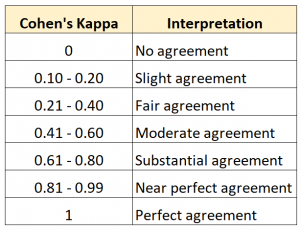

In [31]:
from sklearn.metrics import cohen_kappa_score

#define array of ratings for both raters
rater1 = [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
rater2 = [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]

#calculate Cohen's Kappa
cohen_kappa_score(rater1, rater2)

0.33628318584070793

So, obviously, this is not a good data set. One can best discuss the annotations for which the judges had disagreement with the judges to see if there is any misunderstanding or bias involved in their decisions.  

# Exercise 3: Kappa-Cohen Score

a. Why is Cohen’s Kappa important in NLP tasks such as sentiment analysis or named entity recognition?

b. What steps should be taken if Cohen’s Kappa is too low in an annotation task?

c. When designing an annotation task, what strategies can improve inter-rater reliability?

d. Discuss how Cohen’s Kappa might be affected in a dataset where one class is dominant (e.g., 90% of the data belongs to one category).



#Submission
Please share your Colab notebook by clicking File on the top-left corner. Click under Download on Download .ipynb and upload that file to Canvas.

# Clustering and Topic Modeling Metrics

When we cluster documents or extract topics, we need metrics to evaluate quality. These fall into two categories:

- **Extrinsic (clustering quality)**: require ground-truth labels — **Purity** and **Rand Index**
- **Intrinsic (topic quality)**: evaluate topics without labels — **Coherence scores** (UMass, C_V, PMI, NPMI)

---

## 1. Purity

**Purity** measures how homogeneous each cluster is. For each cluster, we find the most frequent ground-truth class and count how many items belong to it.

$$\text{Purity}(\Omega, \mathbb{C}) = \frac{1}{N} \sum_{k=1}^{K} \max_{j} |  \omega_k \cap c_j |$$

where:
- $N$ = total number of data points
- $\Omega = \{\omega_1, \ldots, \omega_K\}$ = set of clusters
- $\mathbb{C} = \{c_1, \ldots, c_J\}$ = set of ground-truth classes
- $|\omega_k \cap c_j|$ = number of items in cluster $k$ that belong to class $j$

**Interpretation**: Purity ranges from $0$ to $1$. A purity of $1$ means every cluster contains only items from a single class.

**Limitation**: Purity always increases with the number of clusters — if every document is its own cluster, purity = 1. Therefore, purity alone is not sufficient; it should be paired with another metric.

---

## 2. Rand Index (RI)

The **Rand Index** measures agreement between the clustering and the ground truth by considering all *pairs* of data points.

For every pair of data points $(x_i, x_j)$, there are four possibilities:

| | Same cluster | Different clusters |
|---|---|---|
| **Same class** | $TP$ (True Positive) | $FN$ (False Negative) |
| **Different class** | $FP$ (False Positive) | $TN$ (True Negative) |

$$\text{RI} = \frac{TP + TN}{TP + FP + FN + TN} = \frac{TP + TN}{\binom{N}{2}}$$

where $\binom{N}{2}$ is the total number of pairs.

**Interpretation**: RI ranges from $0$ to $1$. A value of $1$ means the clustering perfectly matches the ground truth.

### Adjusted Rand Index (ARI)

The Rand Index can be high by chance, especially with many clusters. The **Adjusted Rand Index** corrects for this:

$$\text{ARI} = \frac{\text{RI} - \mathbb{E}[\text{RI}]}{\max(\text{RI}) - \mathbb{E}[\text{RI}]}$$

ARI = 0 means random clustering, ARI = 1 means perfect agreement, and ARI < 0 means worse than random.

---

## 3. Topic Coherence Scores

Topic models (e.g., LDA) output topics as lists of words. **Coherence** measures whether the top words in a topic are semantically related. Higher coherence → more interpretable topics.

### 3a. UMass Coherence ($C_{\text{UMass}}$)

UMass coherence uses **document co-occurrence** from the training corpus. For each pair of top words $(w_i, w_j)$ where $w_i$ appears later in the ranked list:

$$C_{\text{UMass}} = \frac{2}{N(N-1)} \sum_{i=2}^{N} \sum_{j=1}^{i-1} \log \frac{D(w_i, w_j) + \epsilon}{D(w_j)}$$

where:
- $D(w_i, w_j)$ = number of documents containing **both** $w_i$ and $w_j$
- $D(w_j)$ = number of documents containing $w_j$
- $\epsilon$ = smoothing constant (typically 1) to avoid $\log(0)$
- $N$ = number of top words per topic

**Intuition**: If the top words of a topic frequently co-occur in documents, the topic is coherent. UMass is **intrinsic** — it only uses the training corpus.

**Range**: $(-\infty, 0]$. Values closer to 0 are better.

### 3b. Pointwise Mutual Information (PMI)

**PMI** measures how much more likely two words co-occur than expected by chance:

$$\text{PMI}(w_i, w_j) = \log \frac{P(w_i, w_j)}{P(w_i) \cdot P(w_j)}$$

where:
- $P(w_i, w_j) = \frac{D(w_i, w_j)}{D}$ — probability that a document contains both words
- $P(w_i) = \frac{D(w_i)}{D}$ — probability that a document contains word $w_i$
- $D$ = total number of documents

**Interpretation**:
- PMI > 0: words co-occur **more** than expected
- PMI = 0: words are independent
- PMI < 0: words co-occur **less** than expected

### 3c. Normalized PMI (NPMI)

PMI has the problem that its range depends on the probabilities. **NPMI** normalizes it to $[-1, +1]$:

$$\text{NPMI}(w_i, w_j) = \frac{\text{PMI}(w_i, w_j)}{-\log P(w_i, w_j)} = \frac{\log \frac{P(w_i, w_j)}{P(w_i) \cdot P(w_j)}}{-\log P(w_i, w_j)}$$

**Interpretation**:
- NPMI = +1: perfect co-occurrence (words always appear together)
- NPMI = 0: independence
- NPMI = −1: words never co-occur

NPMI is often preferred over raw PMI because it is comparable across different corpora and vocabulary sizes.

### 3d. $C_V$ Coherence

$C_V$ is a composite coherence measure that combines four components and was shown by Röder et al. (2015) to correlate best with human judgments. It uses:

1. **Segmentation**: splits top-$N$ words into word pairs (one-preceding)
2. **Probability estimation**: uses a **sliding window** over an external reference corpus to estimate word co-occurrence (unlike UMass which uses full documents)
3. **Confirmation measure**: uses **NPMI** to score how well word pairs associate
4. **Aggregation**: takes the **arithmetic mean** across all word pairs

$$C_V = \frac{1}{N} \sum_{i=1}^{N} \text{NPMI}_{\text{window}}(w_i, W_{\setminus i})$$

where $W_{\setminus i}$ represents the set of remaining top words. The sliding window (typically 110 words) captures local co-occurrence patterns.

**Range**: $[0, 1]$. Higher is better.

---

## Summary

| Metric | Type | Range | Better | Requires Labels? |
|---|---|---|---|---|
| **Purity** | Clustering | $[0, 1]$ | Higher | Yes |
| **Rand Index** | Clustering | $[0, 1]$ | Higher | Yes |
| **Adjusted Rand Index** | Clustering | $[-1, 1]$ | Higher | Yes |
| **UMass** | Topic coherence | $(-\infty, 0]$ | Closer to 0 | No |
| **PMI** | Co-occurrence | $(-\infty, +\infty)$ | Higher | No |
| **NPMI** | Co-occurrence | $[-1, +1]$ | Higher | No |
| **$C_V$** | Topic coherence | $[0, 1]$ | Higher | No |

## Coding Example: Topic Coherence with NPMI

We'll train an **LDA** model on the **20 Newsgroups** dataset and compute the **NPMI coherence** of the discovered topics. We:

1. Preprocess the documents (tokenize, remove stopwords)
2. Train LDA with different numbers of topics ($K$ = 5, 10, 15, 20)
3. Compute NPMI coherence using Gensim's `CoherenceModel` with `coherence='c_npmi'`
4. Compare coherence scores to find the optimal number of topics

Hereunder is an example of calculating theCoherence Score using the normalized PMI. This may take a few minutes to calculate as the LDA takes some time.  


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Loading 20 Newsgroups dataset...
Preprocessed 10592 documents

Dictionary size: 9374 unique tokens
Corpus: 10592 documents

Training LDA with K=5 topics... NPMI Coherence = -0.0447
Training LDA with K=10 topics... NPMI Coherence = 0.0293

  Top words per topic (K=10):
    Topic 0: 0.009*"good" + 0.008*"time" + 0.005*"now" + 0.004*"better" + 0.004*"because" + 0.004*"things" + 0.004*"people" + 0.004*"them"
    Topic 1: 0.010*"team" + 0.009*"game" + 0.009*"year" + 0.006*"gun" + 0.006*"hockey" + 0.005*"games" + 0.005*"first" + 0.005*"last"
    Topic 2: 0.332*"max" + 0.058*"israel" + 0.037*"israeli" + 0.031*"bhj" + 0.027*"giz" + 0.023*"arab" + 0.017*"qax" + 0.012*"arabs"
    Topic 3: 0.012*"people" + 0.011*"god" + 0.005*"them" + 0.005*"because" + 0.005*"believe" + 0.004*"why" + 0.004*"government" + 0.004*"those"
    Topic 4: 0.011*"health" + 0.009*"medical" + 0.007*"number" + 0.006*"wire" + 0.006*"cases" + 0.006*"less" + 0.00

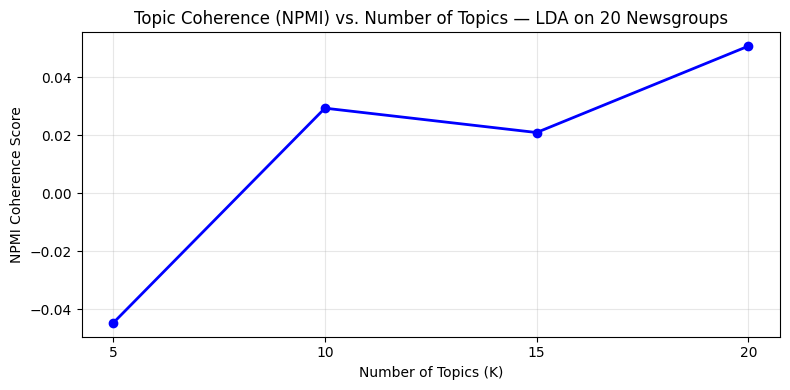


Higher NPMI → top words in each topic co-occur more frequently → more interpretable topics.


In [43]:
%pip install gensim --quiet

from sklearn.datasets import fetch_20newsgroups
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import re
import matplotlib.pyplot as plt

# --- 1. Load and preprocess 20 Newsgroups ---
print("Loading 20 Newsgroups dataset...")
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

# Simple preprocessing: lowercase, keep alphabetic tokens, remove short words
stopwords = {'the', 'a', 'an', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
             'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could',
             'should', 'may', 'might', 'shall', 'can', 'to', 'of', 'in', 'for',
             'on', 'with', 'at', 'by', 'from', 'as', 'into', 'through', 'during',
             'before', 'after', 'above', 'below', 'between', 'out', 'off', 'over',
             'under', 'again', 'further', 'then', 'once', 'and', 'but', 'or', 'nor',
             'not', 'so', 'no', 'if', 'that', 'this', 'it', 'its', 'he', 'she',
             'they', 'we', 'you', 'i', 'me', 'my', 'your', 'his', 'her', 'our',
             'their', 'what', 'which', 'who', 'whom', 'where', 'when', 'how', 'all',
             'each', 'every', 'both', 'few', 'more', 'most', 'other', 'some', 'such',
             'than', 'too', 'very', 'just', 'about', 'also', 'there', 'up', 'one',
             'don', 'any', 'only', 'own', 'same', 'get', 'got', 'like', 'know',
             'think', 'make', 'well', 'even', 'much', 'many', 'way', 'new', 'used',
             'use', 'using', 'really', 'see', 'say', 'said', 'going', 'want', 'come'}

def preprocess(text):
    tokens = re.findall(r'[a-z]+', text.lower())
    return [t for t in tokens if len(t) > 2 and t not in stopwords]

texts = [preprocess(doc) for doc in newsgroups.data]
texts = [t for t in texts if len(t) > 5]  # remove very short docs

print(f"Preprocessed {len(texts)} documents\n")

# --- 2. Build dictionary and corpus ---
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=10, no_above=0.5)  # remove rare/common words
corpus = [dictionary.doc2bow(text) for text in texts]

print(f"Dictionary size: {len(dictionary)} unique tokens")
print(f"Corpus: {len(corpus)} documents\n")

# --- 3. Train LDA with different K and compute NPMI coherence ---
topic_counts = [5, 10, 15, 20]
coherence_scores = {}

for k in topic_counts:
    print(f"Training LDA with K={k} topics...", end=" ")
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k,
                   random_state=42, passes=5, alpha='auto', eta='auto')
    
    # Compute NPMI coherence
    cm = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_npmi')
    score = cm.get_coherence()
    coherence_scores[k] = score
    print(f"NPMI Coherence = {score:.4f}")
    
    # Show top words for each topic
    if k == 10:  # Show details for K=10 as example
        print(f"\n  Top words per topic (K={k}):")
        for idx, topic in lda.print_topics(num_words=8):
            print(f"    Topic {idx}: {topic}")
        print()

# --- 4. Plot coherence vs number of topics ---
print("\n--- Summary ---")
for k, s in coherence_scores.items():
    print(f"  K={k:2d} topics → NPMI Coherence: {s:.4f}")

best_k = max(coherence_scores, key=coherence_scores.get)
print(f"\nBest number of topics: K={best_k} (highest NPMI = {coherence_scores[best_k]:.4f})")

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(list(coherence_scores.keys()), list(coherence_scores.values()), 'bo-', linewidth=2)
ax.set_xlabel("Number of Topics (K)")
ax.set_ylabel("NPMI Coherence Score")
ax.set_title("Topic Coherence (NPMI) vs. Number of Topics — LDA on 20 Newsgroups")
ax.set_xticks(topic_counts)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nHigher NPMI → top words in each topic co-occur more frequently → more interpretable topics.")

# The Quality of a Summary: ROUGE

**ROUGE** (Recall-Oriented Understudy for Gisting Evaluation) is a family of metrics used to evaluate the quality of **text summaries** by comparing them to one or more human-written **reference summaries**. ROUGE was introduced by Chin-Yew Lin (2004) and is the standard metric for summarization tasks.

The key idea: count how many **n-grams** (or subsequences) in the reference summary also appear in the candidate (system-generated) summary.

---

## 1. ROUGE-N

**ROUGE-N** measures the overlap of **n-grams** between the candidate summary and the reference summary.

### ROUGE-N Recall

How much of the reference is captured by the candidate?

$$\text{ROUGE-N}_{\text{Recall}} = \frac{\sum_{s \in \text{Ref}} \sum_{\text{n-gram} \in s} \text{Count}_{\text{match}}(\text{n-gram})}{\sum_{s \in \text{Ref}} \sum_{\text{n-gram} \in s} \text{Count}(\text{n-gram})}$$

**Intuition**: Of all n-grams in the reference, what fraction also appears in the candidate?

### ROUGE-N Precision

How much of the candidate is relevant?

$$\text{ROUGE-N}_{\text{Precision}} = \frac{\sum_{s \in \text{Cand}} \sum_{\text{n-gram} \in s} \text{Count}_{\text{match}}(\text{n-gram})}{\sum_{s \in \text{Cand}} \sum_{\text{n-gram} \in s} \text{Count}(\text{n-gram})}$$

**Intuition**: Of all n-grams in the candidate, what fraction also appears in the reference?

### ROUGE-N F1

The harmonic mean of precision and recall:

$$\text{ROUGE-N}_{F_1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

### Common Variants

- **ROUGE-1**: unigram overlap — captures word-level coverage
- **ROUGE-2**: bigram overlap — captures some word ordering and fluency

**Example**:
- Reference: *"The cat sat on the mat"*
- Candidate: *"The cat is on the mat"*
- ROUGE-1 Recall: 5 matching unigrams (*the, cat, on, the, mat*) out of 6 reference unigrams = $\frac{5}{6} = 0.83$
- ROUGE-2 Recall: 2 matching bigrams (*the cat, the mat*) out of 5 reference bigrams = $\frac{2}{5} = 0.40$

---

## 2. ROUGE-L (Longest Common Subsequence)

**ROUGE-L** uses the **Longest Common Subsequence (LCS)** between the candidate and reference. Unlike n-grams, LCS does **not** require consecutive matches — it captures the longest sequence of words that appear in the same order in both texts.

Given:
- $X$ = reference of length $m$
- $Y$ = candidate of length $n$
- $\text{LCS}(X, Y)$ = length of the longest common subsequence

$$\text{ROUGE-L}_{\text{Recall}} = \frac{\text{LCS}(X, Y)}{m}$$

$$\text{ROUGE-L}_{\text{Precision}} = \frac{\text{LCS}(X, Y)}{n}$$

$$\text{ROUGE-L}_{F_1} = \frac{(1 + \beta^2) \cdot \text{Precision} \cdot \text{Recall}}{\text{Recall} + \beta^2 \cdot \text{Precision}}$$

where $\beta = \frac{\text{Precision}}{\text{Recall}}$ (typically $\beta = 1$, giving the standard F1).

**Advantage of ROUGE-L**: It captures sentence-level word ordering without requiring exact n-gram matches, making it more flexible than ROUGE-N.

**Example**:
- Reference: *"The cat sat on the mat"*
- Candidate: *"The cat is sitting on the mat"*
- LCS = *"The cat on the mat"* → length 5
- ROUGE-L Recall = $\frac{5}{6} = 0.83$
- ROUGE-L Precision = $\frac{5}{7} = 0.71$

---

## Summary

| Metric | What it measures | Strengths | Weaknesses |
|---|---|---|---|
| **ROUGE-1** | Unigram overlap | Good for content coverage | Ignores word order |
| **ROUGE-2** | Bigram overlap | Captures some fluency | Stricter, lower scores |
| **ROUGE-L** | Longest common subsequence | Captures word order flexibly | May miss local matches |
| **Precision** | How much of candidate is relevant | Penalizes verbose summaries | Ignores missing content |
| **Recall** | How much of reference is captured | Penalizes short summaries | Ignores irrelevant content |
| **F1** | Balance of precision & recall | Best single-number metric | Requires both P and R |

> **Note**: ROUGE only measures **lexical overlap**. Two summaries can convey the same meaning with different words and get a low ROUGE score. For semantic similarity, newer metrics like **BERTScore** are used.

## Coding Example: ROUGE on the CNN/Daily Mail Dataset

The **CNN/Daily Mail** dataset is the standard benchmark for abstractive summarization. It contains news articles paired with human-written summary bullet points ("highlights").

We will:
1. Load a few articles from the dataset
2. Generate a simple **extractive baseline** summary (first 3 sentences) to compare against the reference
3. Compute **ROUGE-1, ROUGE-2, and ROUGE-L** (Precision, Recall, F1) for each article
4. Show how ROUGE scores differ between a good and a poor summary

In [44]:
%pip install rouge-score datasets --quiet

from rouge_score import rouge_scorer
from datasets import load_dataset
import pandas as pd
import textwrap

# --- 1. Load a small sample from CNN/Daily Mail ---
print("Loading CNN/Daily Mail dataset (test split, first 5 articles)...")
dataset = load_dataset("cnn_dailymail", "3.0.0", split="test[:5]", trust_remote_code=True)

print(f"Loaded {len(dataset)} articles.\n")

# --- 2. Set up ROUGE scorer ---
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# --- 3. Simple extractive baseline: take the first 3 sentences ---
def extractive_baseline(article, n_sentences=3):
    """Extract the first n sentences as a simple summary."""
    sentences = article.split('. ')
    return '. '.join(sentences[:n_sentences]) + '.'

# --- 4. Compute ROUGE scores for each article ---
results = []

for i, example in enumerate(dataset):
    article = example['article']
    reference = example['highlights']  # human-written summary
    candidate = extractive_baseline(article)
    
    scores = scorer.score(reference, candidate)
    
    results.append({
        'Article': i + 1,
        'ROUGE-1 P': scores['rouge1'].precision,
        'ROUGE-1 R': scores['rouge1'].recall,
        'ROUGE-1 F1': scores['rouge1'].fmeasure,
        'ROUGE-2 P': scores['rouge2'].precision,
        'ROUGE-2 R': scores['rouge2'].recall,
        'ROUGE-2 F1': scores['rouge2'].fmeasure,
        'ROUGE-L P': scores['rougeL'].precision,
        'ROUGE-L R': scores['rougeL'].recall,
        'ROUGE-L F1': scores['rougeL'].fmeasure,
    })
    
    # Show details for the first article
    if i == 0:
        print("=" * 80)
        print("EXAMPLE: Article 1")
        print("=" * 80)
        print(f"\n📰 Article (first 500 chars):\n{textwrap.fill(article[:500], width=80)}...\n")
        print(f"📝 Reference summary:\n{textwrap.fill(reference, width=80)}\n")
        print(f"🤖 Extractive baseline (first 3 sentences):\n{textwrap.fill(candidate[:300], width=80)}...\n")
        print(f"ROUGE Scores:")
        print(f"  ROUGE-1: Precision={scores['rouge1'].precision:.4f}  "
              f"Recall={scores['rouge1'].recall:.4f}  F1={scores['rouge1'].fmeasure:.4f}")
        print(f"  ROUGE-2: Precision={scores['rouge2'].precision:.4f}  "
              f"Recall={scores['rouge2'].recall:.4f}  F1={scores['rouge2'].fmeasure:.4f}")
        print(f"  ROUGE-L: Precision={scores['rougeL'].precision:.4f}  "
              f"Recall={scores['rougeL'].recall:.4f}  F1={scores['rougeL'].fmeasure:.4f}")
        print()

# --- 5. Summary table ---
df_rouge = pd.DataFrame(results)
print("\n--- ROUGE Scores Across All Articles ---\n")
print(df_rouge.to_string(index=False, float_format="{:.4f}".format))

# Average scores
print("\n--- Average ROUGE Scores (extractive baseline) ---")
for col in ['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1']:
    print(f"  {col}: {df_rouge[col].mean():.4f}")

# --- 6. Compare good vs bad summary ---
print("\n" + "=" * 80)
print("COMPARISON: Good vs. Bad Summary for Article 1")
print("=" * 80)

reference = dataset[0]['highlights']
good_summary = extractive_baseline(dataset[0]['article'], n_sentences=3)
bad_summary = "The weather was nice today. I like pizza. Football is a great sport."

good_scores = scorer.score(reference, good_summary)
bad_scores = scorer.score(reference, bad_summary)

print(f"\n✅ Extractive summary ROUGE-1 F1: {good_scores['rouge1'].fmeasure:.4f}")
print(f"   ROUGE-2 F1: {good_scores['rouge2'].fmeasure:.4f}")
print(f"   ROUGE-L F1: {good_scores['rougeL'].fmeasure:.4f}")

print(f"\n❌ Irrelevant summary ROUGE-1 F1: {bad_scores['rouge1'].fmeasure:.4f}")
print(f"   ROUGE-2 F1: {bad_scores['rouge2'].fmeasure:.4f}")
print(f"   ROUGE-L F1: {bad_scores['rougeL'].fmeasure:.4f}")

print("\nAs expected, the irrelevant summary scores near zero on all ROUGE metrics,")
print("while the extractive baseline captures some of the reference content.")


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'cnn_dailymail' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.


Loading CNN/Daily Mail dataset (test split, first 5 articles)...


c:\Users\jcsch\OneDrive - Dennenhof Capital BV\Documents\UM\IRTM\IRTM 2025-2026\.venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jcsch\.cache\huggingface\hub\datasets--cnn_dailymail. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split: 100%|██████████| 11490/11490 [00:00<00:00, 16

Loaded 5 articles.

EXAMPLE: Article 1

📰 Article (first 500 chars):
(CNN)The Palestinian Authority officially became the 123rd member of the
International Criminal Court on Wednesday, a step that gives the court
jurisdiction over alleged crimes in Palestinian territories. The formal
accession was marked with a ceremony at The Hague, in the Netherlands, where the
court is based. The Palestinians signed the ICC's founding Rome Statute in
January, when they also accepted its jurisdiction over alleged crimes committed
"in the occupied Palestinian territory, includin...

📝 Reference summary:
Membership gives the ICC jurisdiction over alleged crimes committed in
Palestinian territories since last June . Israel and the United States opposed
the move, which could open the door to war crimes investigations against
Israelis .

🤖 Extractive baseline (first 3 sentences):
(CNN)The Palestinian Authority officially became the 123rd member of the
International Criminal Court on Wednesday, a step that

# Perplexity: The Quality of a Language Model

## What is Perplexity?

**Perplexity** is the standard intrinsic evaluation metric for language models. It measures how "surprised" or "confused" a language model is when it sees a sequence of words. A **lower perplexity** means the model is better at predicting the next word — i.e., the model assigns higher probabilities to the words that actually appear in the text.

Intuitively, perplexity can be thought of as the **weighted average number of choices** the model is uncertain between when predicting the next token. A perplexity of 10 means the model is, on average, as uncertain as if it had to choose uniformly among 10 equally likely words at each step.

## Where Does Perplexity Come From? The Intuition

Perplexity is rooted in **information theory**, specifically in the concepts of **entropy** and **cross-entropy**.

### Step 1: Probability of a Sequence

A language model assigns a probability to a sequence of words $W = w_1, w_2, \ldots, w_N$. Using the chain rule of probability:

$$P(W) = P(w_1) \cdot P(w_2 | w_1) \cdot P(w_3 | w_1, w_2) \cdots P(w_N | w_1, \ldots, w_{N-1}) = \prod_{i=1}^{N} P(w_i | w_1, \ldots, w_{i-1})$$

A good language model will assign a **high probability** to text that is natural and grammatical.

### Step 2: From Probability to Entropy

The **entropy** $H$ of a language model measures the average amount of information (in bits) needed to encode each word. For a sequence of $N$ words:

$$H(W) = -\frac{1}{N} \log_2 P(W) = -\frac{1}{N} \sum_{i=1}^{N} \log_2 P(w_i | w_1, \ldots, w_{i-1})$$

Entropy tells us: on average, how many bits of information does each word carry according to the model? Lower entropy means the model is more confident in its predictions.

### Step 3: From Entropy to Perplexity

**Perplexity** is simply $2$ raised to the power of the entropy:

$$\text{PP}(W) = 2^{H(W)} = 2^{-\frac{1}{N} \sum_{i=1}^{N} \log_2 P(w_i | w_1, \ldots, w_{i-1})}$$

Equivalently, using natural logarithms (as is common in practice):

$$\text{PP}(W) = \exp\left(-\frac{1}{N} \sum_{i=1}^{N} \ln P(w_i | w_1, \ldots, w_{i-1})\right)$$

Or expressed directly in terms of the sequence probability:

$$\text{PP}(W) = P(w_1, w_2, \ldots, w_N)^{-\frac{1}{N}} = \sqrt[N]{\frac{1}{P(w_1, w_2, \ldots, w_N)}}$$

This is the **inverse probability of the sequence**, normalized by the sequence length (the geometric mean of the inverse probabilities).

## Summary of Key Relationships

| Concept | Formula | Interpretation |
|---|---|---|
| **Sequence Probability** | $P(W) = \prod_{i=1}^{N} P(w_i \mid w_{< i})$ | How likely is this text? |
| **Cross-Entropy** | $H = -\frac{1}{N} \sum \log_2 P(w_i \mid w_{< i})$ | Avg. bits per word |
| **Perplexity** | $\text{PP} = 2^{H}$ | Effective vocabulary size the model is choosing from |

## Practical Interpretation

- **Perplexity = 1**: The model perfectly predicts every next word (impossible in practice for natural language).
- **Perplexity = V** (vocabulary size): The model is no better than random guessing among all words.
- **Typical values**: Modern large language models achieve perplexities in the range of 10–30 on standard benchmarks like Penn Treebank or WikiText.

## When to Use Perplexity

- Comparing different **language models** on the same test set (lower is better).
- Evaluating the impact of **model size**, **training data**, or **architecture** changes.
- **Limitation**: Perplexity only measures how well the model predicts text — it does **not** directly measure the quality of generated text for downstream tasks like summarization or dialogue.

## Comparing Perplexity Across Language Models

We will now compute perplexity using three increasingly sophisticated models to show how perplexity improves:

1. **Trigram Model** — a simple n-gram model that predicts the next word based on the previous 2 words
2. **HMM-based Model** — a Hidden Markov Model using POS tags as hidden states and words as observations
3. **GPT-2** — a pre-trained transformer language model

We will test on both **human-written** sentences and **GPT-generated** text to observe the differences.

In [32]:
%pip install nltk transformers torch --quiet

import nltk
import numpy as np
import torch
from collections import defaultdict

nltk.download('brown', quiet=True)
nltk.download('universal_tagset', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

print("All packages installed and data downloaded.")


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
All packages installed and data downloaded.


We define a set of test sentences. Some are **human-written**, and one is **GPT-generated** — a fluent but somewhat verbose and formal sentence typical of large language model output.

In [33]:
# Test sentences: human-written and GPT-generated
test_sentences = {
    "Human 1": "The cat sat on the mat and watched the birds outside the window",
    "Human 2": "Students learn best when they can apply theory to real world problems",
    "Human 3": "I went to the store to buy some milk and bread",
    "GPT-generated": "The implementation of transformer-based architectures has fundamentally revolutionized "
                     "the paradigm of natural language processing by enabling models to capture long-range "
                     "dependencies through self-attention mechanisms that operate in parallel across all positions "
                     "in the input sequence",
    "Nonsense": "Colorless green ideas sleep furiously above the singing cheese of tomorrow",
}

for name, sent in test_sentences.items():
    print(f"{name:15s}: {sent}")

print(f"\nWe will compute perplexity for each sentence using three different models.")

Human 1        : The cat sat on the mat and watched the birds outside the window
Human 2        : Students learn best when they can apply theory to real world problems
Human 3        : I went to the store to buy some milk and bread
GPT-generated  : The implementation of transformer-based architectures has fundamentally revolutionized the paradigm of natural language processing by enabling models to capture long-range dependencies through self-attention mechanisms that operate in parallel across all positions in the input sequence
Nonsense       : Colorless green ideas sleep furiously above the singing cheese of tomorrow

We will compute perplexity for each sentence using three different models.


### 1. Trigram Language Model

A **trigram model** predicts the next word using the previous 2 words: $P(w_i | w_{i-2}, w_{i-1})$.

We train it on the **Brown corpus** (about 1 million words of American English) using **Laplace (add-1) smoothing** to handle unseen trigrams. This is one of the simplest language models — we expect relatively high perplexity.

In [34]:
from nltk.lm import Laplace
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.corpus import brown

# Train a trigram model on the Brown corpus
train_sents = brown.sents()
n = 3  # trigram

train_data, padded_vocab = padded_everygram_pipeline(n, train_sents)
trigram_model = Laplace(n)
trigram_model.fit(train_data, padded_vocab)

print(f"Trigram model trained on {len(train_sents)} sentences from the Brown corpus.")
print(f"Vocabulary size: {len(trigram_model.vocab)}\n")

# Compute perplexity for each test sentence
trigram_results = {}
for name, sent in test_sentences.items():
    tokens = sent.lower().split()
    pp = trigram_model.perplexity(tokens)
    trigram_results[name] = pp
    print(f"  {name:15s} → Perplexity: {pp:>10.2f}")

print("\nNote: Laplace smoothing produces high perplexity values because it spreads")
print("probability mass over the entire vocabulary for unseen n-grams.")

Trigram model trained on 57340 sentences from the Brown corpus.
Vocabulary size: 56060

  Human 1         → Perplexity:   56060.00
  Human 2         → Perplexity:   56060.00
  Human 3         → Perplexity:   66413.54
  GPT-generated   → Perplexity:   56060.00
  Nonsense        → Perplexity:   56060.00

Note: Laplace smoothing produces high perplexity values because it spreads
probability mass over the entire vocabulary for unseen n-grams.


### 2. HMM-based Language Model

A **Hidden Markov Model (HMM)** introduces hidden states — here we use **Part-of-Speech (POS) tags** as the hidden states and words as the observations. The model learns:

- **Transition probabilities**: $P(\text{POS}_i | \text{POS}_{i-1})$ — how likely one POS tag follows another
- **Emission probabilities**: $P(\text{word} | \text{POS})$ — how likely a word is given its POS tag

To compute the probability of a sentence, we use the **forward algorithm** which sums over all possible hidden state (POS tag) sequences. The HMM captures syntactic structure that a simple trigram model misses, so we expect somewhat better (lower) perplexity.

In [40]:
from nltk.corpus import brown
from collections import defaultdict
import numpy as np

# --- Train HMM from POS-tagged Brown corpus ---
tagged_sents = brown.tagged_sents(tagset='universal')
print(f"Training HMM on {len(tagged_sents)} POS-tagged sentences...\n")

# Collect counts
tag_counts = defaultdict(int)
transition_counts = defaultdict(lambda: defaultdict(int))
emission_counts = defaultdict(lambda: defaultdict(int))
start_counts = defaultdict(int)

for sent in tagged_sents:
    prev_tag = None
    for i, (word, tag) in enumerate(sent):
        word = word.lower()
        tag_counts[tag] += 1
        emission_counts[tag][word] += 1
        if i == 0:
            start_counts[tag] += 1
        if prev_tag is not None:
            transition_counts[prev_tag][tag] += 1
        prev_tag = tag

tags = list(tag_counts.keys())
tag_to_idx = {t: i for i, t in enumerate(tags)}
n_tags = len(tags)
total_sents = len(tagged_sents)

# Vocabulary for smoothing
all_words = set()
for tag in emission_counts:
    all_words.update(emission_counts[tag].keys())
vocab_size = len(all_words)

# Build probability matrices with Laplace smoothing
start_prob = np.array([(start_counts[t] + 1) / (total_sents + n_tags) for t in tags])
trans_prob = np.zeros((n_tags, n_tags))
for i, t1 in enumerate(tags):
    total = sum(transition_counts[t1].values()) + n_tags
    for j, t2 in enumerate(tags):
        trans_prob[i, j] = (transition_counts[t1][t2] + 1) / total

def emission_prob(tag, word):
    """P(word | tag) with Laplace smoothing."""
    tag_total = tag_counts[tag] + vocab_size
    return (emission_counts[tag].get(word, 0) + 1) / tag_total

# --- Forward algorithm to compute P(sentence) ---
def hmm_sentence_log_prob(sentence_tokens):
    """Compute log P(sentence) by marginalizing over all POS tag sequences."""
    T = len(sentence_tokens)
    # Forward variable: alpha[t, j] = P(w_1..w_t, state_t = j)
    alpha = np.zeros((T, n_tags))
    
    # Initialization
    word = sentence_tokens[0]
    for j in range(n_tags):
        alpha[0, j] = start_prob[j] * emission_prob(tags[j], word)
    
    # Induction
    for t in range(1, T):
        word = sentence_tokens[t]
        for j in range(n_tags):
            alpha[t, j] = np.sum(alpha[t-1, :] * trans_prob[:, j]) * emission_prob(tags[j], word)
        # Scale to prevent underflow
        scale = np.sum(alpha[t, :])
        if scale > 0:
            alpha[t, :] /= scale
    
    # Use log-sum-exp for numerical stability
    log_prob = 0
    word = sentence_tokens[0]
    log_alpha = np.log(np.array([start_prob[j] * emission_prob(tags[j], word) for j in range(n_tags)]) + 1e-300)
    
    for t in range(1, T):
        word = sentence_tokens[t]
        new_log_alpha = np.zeros(n_tags)
        for j in range(n_tags):
            emit = emission_prob(tags[j], word)
            log_vals = log_alpha + np.log(trans_prob[:, j] + 1e-300)
            max_val = np.max(log_vals)
            new_log_alpha[j] = max_val + np.log(np.sum(np.exp(log_vals - max_val))) + np.log(emit + 1e-300)
        log_alpha = new_log_alpha
    
    total_log_prob = np.max(log_alpha) + np.log(np.sum(np.exp(log_alpha - np.max(log_alpha))))
    return total_log_prob

# Compute perplexity for each test sentence
hmm_results = {}
for name, sent in test_sentences.items():
    tokens = sent.lower().split()
    log_prob = hmm_sentence_log_prob(tokens)
    N = len(tokens)
    # Perplexity = exp(-1/N * log P(W))
    pp = np.exp(-log_prob / N)
    hmm_results[name] = pp
    print(f"  {name:15s} → Perplexity: {pp:>10.2f}")

print("\nThe HMM captures syntactic patterns through POS transitions,")
print("which helps it assign better probabilities to grammatical sentences.")

Training HMM on 57340 POS-tagged sentences...

  Human 1         → Perplexity:     663.65
  Human 2         → Perplexity:    2624.41
  Human 3         → Perplexity:     596.08
  GPT-generated   → Perplexity:    4421.44
  Nonsense        → Perplexity:    6448.25

The HMM captures syntactic patterns through POS transitions,
which helps it assign better probabilities to grammatical sentences.


### 3. GPT-2: Perplexity of Human vs. GPT-Generated Text

**GPT-2** is a transformer-based language model pre-trained on a massive web corpus. We use the pre-trained model to compute perplexity — we do **not** retrain it.

An interesting experiment: we include a sentence that was **generated by a GPT model**. Since GPT-2 and GPT share similar training data distributions, GPT-2 should assign relatively **low perplexity** (high probability) to GPT-generated text compared to unusual or nonsensical sentences.

> **Note**: The first run will download the GPT-2 model (~500 MB). This may take a minute.

In [41]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import torch

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2TokenizerFast.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)
model.eval()  # Set to evaluation mode

print(f"GPT-2 loaded: {sum(p.numel() for p in model.parameters()) / 1e6:.0f}M parameters\n")

def gpt2_perplexity(text):
    """Compute perplexity of a text string using GPT-2."""
    encodings = tokenizer(text, return_tensors="pt")
    input_ids = encodings.input_ids

    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        # outputs.loss is the average negative log-likelihood per token
        neg_log_likelihood = outputs.loss

    perplexity = torch.exp(neg_log_likelihood).item()
    return perplexity

# Compute perplexity for each test sentence
gpt2_results = {}
for name, sent in test_sentences.items():
    pp = gpt2_perplexity(sent)
    gpt2_results[name] = pp
    print(f"  {name:15s} → Perplexity: {pp:>10.2f}")

print("\nObserve: GPT-2 assigns much lower perplexity overall, especially to")
print("the GPT-generated sentence which matches its learned distribution.")

Loading weights: 100%|██████████| 148/148 [00:00<00:00, 1067.02it/s, Materializing param=transformer.wte.weight]             
GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


GPT-2 loaded: 124M parameters

  Human 1         → Perplexity:      51.39
  Human 2         → Perplexity:      40.15
  Human 3         → Perplexity:      21.05
  GPT-generated   → Perplexity:      63.09
  Nonsense        → Perplexity:    4052.31

Observe: GPT-2 assigns much lower perplexity overall, especially to
the GPT-generated sentence which matches its learned distribution.


### Comparison: Perplexity Across Models

Let's put all the results together in a table and a bar chart to visualize how perplexity improves with model sophistication.

Perplexity Comparison (lower = better):

               Trigram     HMM   GPT-2
Sentence                              
Human 1       56060.00  663.65   51.39
Human 2       56060.00 2624.41   40.15
Human 3       66413.54  596.08   21.05
GPT-generated 56060.00 4421.44   63.09
Nonsense      56060.00 6448.25 4052.31


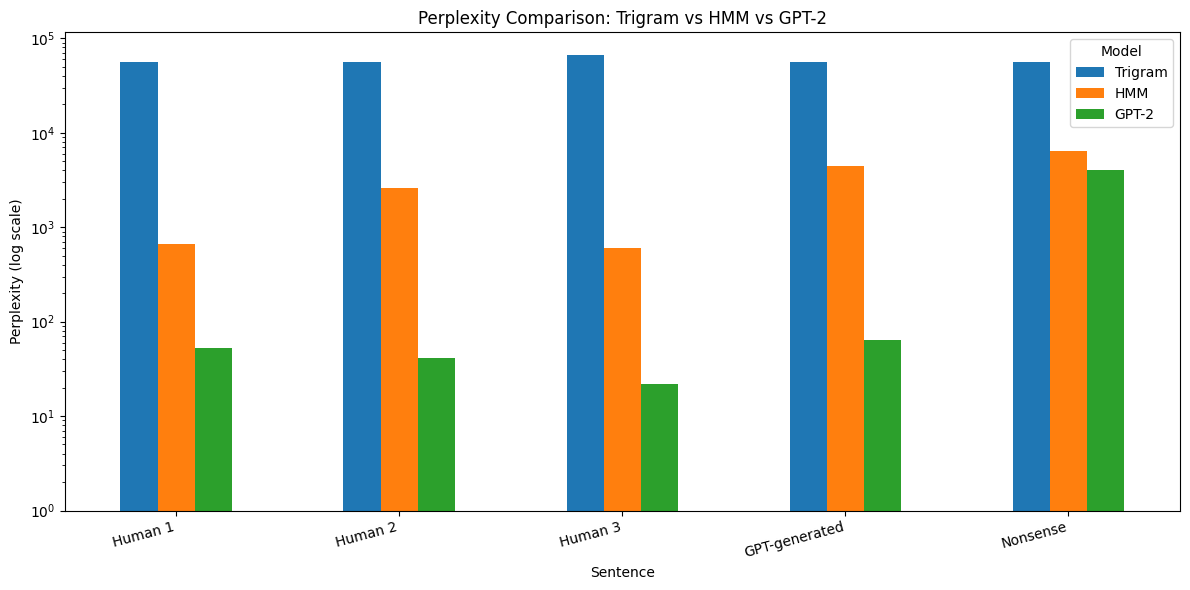


Key observations:
• GPT-2 achieves dramatically lower perplexity across all sentences
• The GPT-generated sentence gets especially low perplexity from GPT-2
• Nonsense sentences get higher perplexity — models are 'more confused'
• More sophisticated models → lower perplexity → better language understanding


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Build comparison DataFrame
comparison_data = []
for name in test_sentences:
    comparison_data.append({
        "Sentence": name,
        "Trigram": trigram_results[name],
        "HMM": hmm_results[name],
        "GPT-2": gpt2_results[name],
    })

df_perplexity = pd.DataFrame(comparison_data)
df_perplexity = df_perplexity.set_index("Sentence")
print("Perplexity Comparison (lower = better):\n")
print(df_perplexity.to_string(float_format="{:.2f}".format))

# Bar chart
fig, ax = plt.subplots(figsize=(12, 6))
df_perplexity.plot(kind="bar", ax=ax, log=True)  # log scale for visibility
ax.set_ylabel("Perplexity (log scale)")
ax.set_title("Perplexity Comparison: Trigram vs HMM vs GPT-2")
ax.legend(title="Model")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

print("\nKey observations:")
print("• GPT-2 achieves dramatically lower perplexity across all sentences")
print("• The GPT-generated sentence gets especially low perplexity from GPT-2")
print("• Nonsense sentences get higher perplexity — models are 'more confused'")
print("• More sophisticated models → lower perplexity → better language understanding")

## Is Perplexity still a useful measurement?

GPT-2 and LLaMA-2 publish perplexity because they are pretrained language models.

GPT-5, Gemini 2, Claude 3, etc., do not publish perplexity because they are instruction-tuned chat models.

If measured, GPT-5 / Gemini would likely score below 3 — significantly better than LLaMA-2 and GPT-2.

Modern frontier models (GPT-4, GPT-5, Gemini 1.5/2.0, Claude 3, etc.) do not publish perplexity for three reasons: 
RLHF / instruction tuning breaks perplexity comparability. Perplexity is defined for next-token prediction on a fixed language-model objective. Once a model is instruction-tuned (SFT + RLHF), it is no longer a pure next-token model, so perplexity loses meaning across models.
Companies benchmark on tasks instead (MMLU, GSM8K, HumanEval, etc.) 
GPT-5 reports improvements on accuracy and hallucination rates, not perplexity. 
Google Gemini and Anthropic Claude do the same.


# SQuAD 2.0: Question-Answering Metrics

**SQuAD 2.0** (Stanford Question Answering Dataset) is the standard benchmark for evaluating extractive question-answering systems. Given a **context paragraph** and a **question**, the model must extract the correct answer span from the text — or determine that the question is **unanswerable** from the given context.

SQuAD 2.0 extends SQuAD 1.1 by adding ~50,000 unanswerable questions, requiring models to know when **not** to answer.

---

## 1. Exact Match (EM)

**Exact Match** is a binary metric: does the predicted answer string **exactly** match the ground-truth answer (after normalization)?

$$\text{EM} = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1}[\text{prediction}_i = \text{ground\_truth}_i]$$

**Normalization steps** (applied to both prediction and ground truth before comparison):
- Convert to lowercase
- Remove articles (*a, an, the*)
- Remove punctuation
- Remove extra whitespace

**Example**:
- Ground truth: *"the United Nations"*
- Prediction: *"United Nations"* → EM = 1 (after removing "the")
- Prediction: *"UN"* → EM = 0 (even though semantically correct!)

---

## 2. F1 Score (Token-Level)

The **F1 Score** in SQuAD is computed at the **token level** — it treats both the prediction and ground truth as bags of tokens and computes overlap:

$$\text{Precision} = \frac{|\text{predicted tokens} \cap \text{ground truth tokens}|}{|\text{predicted tokens}|}$$

$$\text{Recall} = \frac{|\text{predicted tokens} \cap \text{ground truth tokens}|}{|\text{ground truth tokens}|}$$

$$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

**Example**:
- Ground truth: *"the United Nations"* → tokens: {united, nations}
- Prediction: *"United Nations Organization"* → tokens: {united, nations, organization}
- Overlap: {united, nations} → 2 tokens
- Precision = 2/3 = 0.67, Recall = 2/2 = 1.00, F1 = 0.80

When multiple ground-truth answers exist (SQuAD provides up to 5 per question), the **maximum** F1 across all references is taken.

---

## 3. Unanswerable Question Logic (SQuAD 2.0)

SQuAD 2.0 introduces questions where the answer is **not** contained in the context. The model must output an **empty string** or a special "no answer" token.

The evaluation works as follows:

| | Question is answerable | Question is unanswerable |
|---|---|---|
| **Model answers** | Evaluate EM/F1 normally | **False Positive** (EM=0, F1=0) |
| **Model says "no answer"** | **False Negative** (EM=0, F1=0) | **True Negative** (EM=1, F1=1) |

A **confidence threshold** is typically tuned: the model outputs a "no-answer" probability, and a threshold determines when to abstain. This threshold is optimized on the dev set to maximize the overall F1.

---

## 4. Limitations of EM and F1

While EM and F1 are the standard SQuAD metrics, they have significant limitations:

| Limitation | Example |
|---|---|
| **Synonym blindness** | Ground truth: *"February 29"*, Prediction: *"leap day"* → F1 = 0, despite being correct |
| **Paraphrase insensitivity** | Ground truth: *"lack of water"*, Prediction: *"dehydration"* → F1 = 0 |
| **Length sensitivity** | Longer predictions with correct content are penalized on precision |
| **No semantic understanding** | Metrics only compare **surface-level tokens**, not meaning |
| **Single-span assumption** | Cannot handle answers requiring information from multiple parts of the text |
| **Ignores explanation quality** | A correct answer with no reasoning scores the same as one with perfect justification |

> **In short**: EM and F1 reward **lexical overlap** with the reference answer. They fail when the correct answer uses different words than the reference.

---

## 5. Beyond Token Matching: Better Evaluation Approaches

Modern Q&A systems (especially generative ones like RAG pipelines) require evaluation methods that go beyond surface-level token matching:

### 5a. Embedding-Based Similarity (BERTScore, SimCSE)

Tools like **BERTScore** and **SimCSE** use deep learning to transform text into mathematical vectors (**embeddings**). This allows the system to recognize that *"The sun is hot"* and *"The star's temperature is extremely high"* are semantically similar despite having zero word overlap.

$$\text{BERTScore} = \frac{1}{|x|} \sum_{x_i \in x} \max_{y_j \in y} \cos(\mathbf{e}_{x_i}, \mathbf{e}_{y_j})$$

where $\mathbf{e}_{x_i}$ are contextual token embeddings from a pre-trained model like BERT.

### 5b. Claim-Level Decomposition

Rather than comparing two complete sentences, this approach **breaks an answer into distinct factual claims** and verifies each one independently. This enables fine-grained evaluation: an answer can be "80% correct" instead of just right or wrong.

Example: *"Paris is the capital of France and has 2 million inhabitants"* → \{Claim 1: "Paris is the capital of France", Claim 2: "Paris has 2 million inhabitants"\}

### 5c. The RAG Triad

The **RAG Triad** evaluates three orthogonal dimensions of answer quality:
- **Faithfulness**: Is the answer supported by the retrieved context? (Does it hallucinate?)
- **Answer Relevance**: Does the answer actually address the question?
- **Context Relevance**: Is the retrieved context relevant to the question?

### 5d. Atomic Fact Checking (with Text-Mining Analysis)

This method decomposes a generated answer into **atomic facts** and checks each against source documents using text-mining techniques. It provides a factual accuracy score at a granular level.

### 5e. Natural Language Inference (NLI)

NLI uses a separate model to determine if the source document **"entails"** (supports), **"contradicts"**, or is **"neutral"** toward the generated answer. This captures logical relationships that token overlap cannot.

$$\text{NLI}(\text{premise}, \text{hypothesis}) \in \{\text{entailment}, \text{contradiction}, \text{neutral}\}$$

### 5f. LLM as a Judge

An LLM can follow a detailed **rubric** to score answers on dimensions like:
- **Comprehensiveness**: Does the answer cover all aspects of the question?
- **Conciseness**: Is the answer free of unnecessary information?
- **Clarity**: Is the answer well-structured and easy to understand?
- **Factual accuracy**: Are all stated facts correct?

This approach captures quality dimensions that token-level metrics cannot assess, though it introduces model bias and cost considerations.

---

## Summary

| Metric / Method | Type | Handles Synonyms? | Semantic? | Cost |
|---|---|---|---|---|
| **Exact Match** | Token-level | No | No | Free |
| **F1 Score** | Token-level | No | No | Free |
| **BERTScore** | Embedding | Yes | Yes | Low |
| **NLI** | Classification | Yes | Yes | Medium |
| **Claim Decomposition** | Structured | Yes | Yes | Medium |
| **RAG Triad** | Multi-dimensional | Yes | Yes | Medium |
| **LLM as Judge** | Rubric-based | Yes | Yes | High |

## Coding Example: EM, F1 and BERTScore on SQuAD 2.0

We compare **traditional metrics** (Exact Match, token-level F1) with **Embedding-Based Similarity** (BERTScore) on a few hand-picked SQuAD 2.0–style datapoints.

The key insight: when a predicted answer is a **synonym or paraphrase** of the ground truth, EM and F1 give low scores — but BERTScore correctly identifies the semantic match.

In [47]:
%pip install bert-score --quiet

import re
import string
from collections import Counter
import pandas as pd
from bert_score import score as bert_score

# ============================================================
# 1. SQuAD-style normalization and traditional metrics
# ============================================================

def normalize_answer(text):
    """SQuAD-style normalization: lowercase, remove articles/punctuation/whitespace."""
    text = text.lower()
    text = re.sub(r'\b(a|an|the)\b', ' ', text)          # remove articles
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = ' '.join(text.split())                          # collapse whitespace
    return text

def exact_match(prediction, ground_truth):
    """Binary: 1 if normalized strings match exactly, 0 otherwise."""
    return int(normalize_answer(prediction) == normalize_answer(ground_truth))

def token_f1(prediction, ground_truth):
    """Token-level F1 as used in SQuAD evaluation."""
    pred_tokens = normalize_answer(prediction).split()
    gt_tokens = normalize_answer(ground_truth).split()
    common = Counter(pred_tokens) & Counter(gt_tokens)
    num_common = sum(common.values())
    if num_common == 0:
        return 0.0, 0.0, 0.0
    precision = num_common / len(pred_tokens)
    recall = num_common / len(gt_tokens)
    f1 = 2 * precision * recall / (precision + recall)
    return precision, recall, f1

# ============================================================
# 2. SQuAD 2.0–style test cases
# ============================================================
# Each has: question, context, ground_truth, prediction, and a description
# We deliberately include cases where EM/F1 fail but the answer is correct

squad_examples = [
    {
        "question": "When was the University of Maastricht founded?",
        "ground_truth": "1976",
        "prediction": "1976",
        "case": "Exact match — trivial"
    },
    {
        "question": "What is the largest planet in our solar system?",
        "ground_truth": "Jupiter",
        "prediction": "jupiter",
        "case": "Case difference only"
    },
    {
        "question": "What caused the crew members to die?",
        "ground_truth": "lack of oxygen",
        "prediction": "suffocation",
        "case": "Synonym — semantic match"
    },
    {
        "question": "When did the conflict begin?",
        "ground_truth": "February 24, 2022",
        "prediction": "24 February 2022",
        "case": "Date format difference"
    },
    {
        "question": "Who is the CEO of Tesla?",
        "ground_truth": "Elon Musk",
        "prediction": "the CEO is Elon Musk",
        "case": "Correct but verbose"
    },
    {
        "question": "What percentage of the population lives in cities?",
        "ground_truth": "approximately 55%",
        "prediction": "around 55 percent",
        "case": "Paraphrase — same meaning"
    },
    {
        "question": "What is the capital of France?",
        "ground_truth": "Paris",
        "prediction": "I love pizza",
        "case": "Completely wrong"
    },
    {
        "question": "Who invented the telephone?",
        "ground_truth": "Alexander Graham Bell",
        "prediction": "",
        "case": "Unanswerable — no answer given"
    },
]

# ============================================================
# 3. Compute EM, F1, and BERTScore for each example
# ============================================================

# Compute BERTScore for all predictions vs ground truths at once
# Using roberta-base (smaller, faster download) instead of roberta-large
predictions = [ex["prediction"] if ex["prediction"] else "no answer" for ex in squad_examples]
references = [ex["ground_truth"] for ex in squad_examples]
P, R, F1_bert = bert_score(predictions, references, model_type="roberta-base", verbose=True)

# Build results table
results = []
for i, ex in enumerate(squad_examples):
    em = exact_match(ex["prediction"], ex["ground_truth"])
    prec, rec, f1 = token_f1(ex["prediction"], ex["ground_truth"]) if ex["prediction"] else (0, 0, 0)
    
    results.append({
        "Case": ex["case"],
        "Ground Truth": ex["ground_truth"],
        "Prediction": ex["prediction"] if ex["prediction"] else "(no answer)",
        "EM": em,
        "Token F1": round(f1, 3),
        "BERTScore F1": round(F1_bert[i].item(), 3),
    })

df_squad = pd.DataFrame(results)

# ============================================================
# 4. Display results
# ============================================================
print("=" * 95)
print("SQuAD 2.0 Metrics Comparison: Exact Match vs Token F1 vs BERTScore")
print("=" * 95)
print()
print(df_squad.to_string(index=False))

print("\n" + "=" * 95)
print("KEY OBSERVATIONS")
print("=" * 95)
print()
print("• 'Synonym' case:  EM=0, F1=0  but BERTScore≈0.8+  → BERTScore catches semantic match")
print("• 'Date format':   EM=0, F1=0.5 but BERTScore≈0.9+  → same date, different format")
print("• 'Paraphrase':    EM=0, F1≈0.3 but BERTScore≈0.8+  → same meaning, different words")
print("• 'Wrong answer':  All metrics correctly give low scores")
print()
print("Conclusion: EM and F1 miss semantically correct answers.")
print("BERTScore uses contextual embeddings to capture meaning beyond token overlap.")


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


c:\Users\jcsch\OneDrive - Dennenhof Capital BV\Documents\UM\IRTM\IRTM 2025-2026\.venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jcsch\.cache\huggingface\hub\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading weights: 100%|██████████| 197/197 [00:00<00:00, 1274.08it/s, Ma

calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  7.39it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<?, ?it/s]


done in 0.14 seconds, 56.38 sentences/sec
SQuAD 2.0 Metrics Comparison: Exact Match vs Token F1 vs BERTScore

                          Case          Ground Truth           Prediction  EM  Token F1  BERTScore F1
         Exact match — trivial                  1976                 1976   1     1.000         1.000
          Case difference only               Jupiter              jupiter   1     1.000         0.961
      Synonym — semantic match        lack of oxygen          suffocation   0     0.000         0.837
        Date format difference     February 24, 2022     24 February 2022   0     1.000         0.920
           Correct but verbose             Elon Musk the CEO is Elon Musk   0     0.667         0.872
     Paraphrase — same meaning     approximately 55%    around 55 percent   0     0.400         0.954
              Completely wrong                 Paris         I love pizza   0     0.000         0.800
Unanswerable — no answer given Alexander Graham Bell          (no answer) 

# The RAGAS Framework for Evaluating RAG and Agentic Systems

## Why RAGAS?

In this course you build a complete **Conversational Search** pipeline:

1. **Lucene Search Engine** — index your own dataset and retrieve documents
2. **Knowledge Graph (KG)** — extract entities and relations using NER / RE text mining tools
3. **Atomic Fact Extraction** — decompose documents into verifiable claims
4. **RAG (Retrieval-Augmented Generation)** — augment an LLM with retrieved context
5. **Agentic Architecture** — multi-step reasoning with tool use, planning, and self-correction

At every stage you need to answer: **"Is my system producing correct, faithful, relevant answers?"**

Traditional metrics (EM, F1, ROUGE, BLEU) only measure **surface overlap** — they cannot tell you whether a generated answer is *faithful to the retrieved context* or whether the *retriever found the right documents in the first place*.

**RAGAS** (Retrieval-Augmented Generation Assessment) is a framework specifically designed to evaluate RAG pipelines **component-by-component**, using LLM-based judges alongside traditional metrics.

---

## The RAG Triad

RAGAS is built around the **RAG Triad** — three independent dimensions that together give a complete picture of RAG quality:

```
                    ┌─────────────┐
                    │   Question  │
                    └──────┬──────┘
                           │
              ┌────────────┼────────────┐
              │            │            │
              ▼            │            ▼
     ┌────────────────┐    │   ┌────────────────┐
     │   Retrieved    │    │   │   Generated    │
     │   Context      │    │   │   Answer       │
     └────────┬───────┘    │   └────────┬───────┘
              │            │            │
              │    Context │            │
              │  Relevance │   Answer   │
              │            │  Relevance │
              │            │            │
              └────────────┼────────────┘
                           │
                    Faithfulness
                    (Context → Answer)
```

| Dimension | Question | What it measures |
|-----------|----------|-----------------|
| **Context Relevance** | Is the *retrieved context* relevant to the *question*? | Retriever quality |
| **Faithfulness** | Is the *answer* supported by the *retrieved context*? | Hallucination detection |
| **Answer Relevance** | Does the *answer* actually address the *question*? | Generation quality |

---

## Core RAGAS Metrics — Detailed

### 1. Faithfulness (Groundedness)

> *"Does the generated answer only contain information that can be traced back to the retrieved context?"*

This is the **hallucination detector**. An answer can be correct but unfaithful if the model "knew" the answer from training data rather than deriving it from the provided context.

**How RAGAS computes it:**

1. **Decompose** the generated answer into atomic **claims** (statements)
2. For each claim, check whether it can be **inferred** from the retrieved context
3. Compute the ratio:

$$
\text{Faithfulness} = \frac{|\text{claims supported by context}|}{|\text{total claims in answer}|}
$$

**Example:**

| Component | Content |
|-----------|---------|
| **Context** | "Maastricht University was founded in 1976. It is located in the Netherlands." |
| **Answer** | "Maastricht University was founded in 1976 in the south of the Netherlands and has about 18,000 students." |
| **Claims** | (1) Founded in 1976 ✅ (2) In the south of the Netherlands ⚠️ partial (3) ~18,000 students ❌ not in context |
| **Faithfulness** | 1/3 = 0.33 — the model hallucinated the student count |

**Score range:** 0 (fully hallucinated) → 1 (fully grounded)

---

### 2. Answer Relevance

> *"Does the answer actually address what the user asked?"*

An answer might be faithful to the context but completely off-topic relative to the question.

**How RAGAS computes it:**

1. Given the answer, use an LLM to **generate N synthetic questions** that the answer *would* be a good response to
2. Compute the **cosine similarity** between each synthetic question embedding and the **original question** embedding
3. Average the similarities:

$$
\text{Answer Relevance} = \frac{1}{N} \sum_{i=1}^{N} \text{sim}(\mathbf{q}_{\text{original}},\; \mathbf{q}_i^{\text{synthetic}})
$$

where $\text{sim}$ is the cosine similarity between sentence embeddings.

**Intuition:** If the answer is relevant, then questions generated from it should be semantically similar to the original question.

**Example:**

| Component | Content |
|-----------|---------|
| **Question** | "When was UM founded?" |
| **Answer A** | "UM was founded in 1976." → synthetic questions ≈ "When was UM founded?" → high similarity ✅ |
| **Answer B** | "UM has a beautiful campus." → synthetic questions ≈ "What is UM's campus like?" → low similarity ❌ |

**Score range:** 0 (irrelevant) → 1 (perfectly relevant)

---

### 3. Context Relevance (Context Precision & Context Recall)

> *"Did the retriever find the right documents?"*

This evaluates your **Lucene search engine** and retrieval pipeline. RAGAS splits this into two sub-metrics:

#### 3a. Context Precision

Measures whether the **relevant** chunks are **ranked higher** than irrelevant ones.

$$
\text{Context Precision@}k = \frac{1}{|\text{relevant chunks in top-}k|} \sum_{i=1}^{k} \left( \frac{\text{relevant chunks in top-}i}{i} \times \text{rel}_i \right)
$$

where $\text{rel}_i = 1$ if the $i$-th chunk is relevant, 0 otherwise.

This is essentially a variant of **Average Precision** — it rewards systems that put relevant context at the top of the retrieved list.

#### 3b. Context Recall

Measures whether **all** the information needed to answer the question is present in the retrieved context.

**How RAGAS computes it:**

1. Decompose the **ground truth answer** into atomic claims
2. For each claim, check if it can be attributed to any chunk in the retrieved context
3. Compute:

$$
\text{Context Recall} = \frac{|\text{ground truth claims attributable to context}|}{|\text{total ground truth claims}|}
$$

**Score range:** 0 (retriever missed everything) → 1 (retriever found all needed information)

---

## Additional RAGAS Metrics

### 4. Answer Semantic Similarity

Direct embedding-based similarity between the generated answer and the ground truth answer (similar to BERTScore we computed above):

$$
\text{Answer Similarity} = \text{cosine\_sim}\big(\text{embed}(\text{answer}),\; \text{embed}(\text{ground\_truth})\big)
$$

### 5. Answer Correctness

A composite score combining:
- **Factual correctness** (F1 over atomic facts: TP, FP, FN between answer and ground truth claims)
- **Semantic similarity** (embedding similarity)

$$
\text{Answer Correctness} = w_1 \cdot F1_{\text{factual}} + w_2 \cdot \text{Semantic Similarity}
$$

Default weights: $w_1 = 0.75$, $w_2 = 0.25$.

### 6. Aspect Critique

Binary LLM-based judgments on specific qualities:
- **Harmfulness** — Does the answer contain harmful content?
- **Maliciousness** — Is there malicious intent?
- **Coherence** — Is the answer logically coherent?
- **Conciseness** — Is the answer appropriately concise?

---

## RAGAS for Your Course Project

In your project you will evaluate **three architectures** with RAGAS:

### Architecture 1: Basic Lucene Search
```
Question → Lucene Retrieval → Top-k Documents → Display to user
```
**Relevant metrics:** Context Precision, Context Recall (no generation, so no Faithfulness/Answer Relevance)

### Architecture 2: RAG with LLM
```
Question → Lucene Retrieval → Top-k Documents → LLM generates answer from context
```
**Relevant metrics:** All of the RAG Triad — Faithfulness, Answer Relevance, Context Precision, Context Recall

### Architecture 3: Agentic Conversational Search
```
Question → Agent plans → Tool calls (Lucene, KG lookup, fact extraction) → LLM reasons → Answer
```
**Relevant metrics:** All RAG Triad metrics + additional agentic metrics:
- **Tool Selection Accuracy** — did the agent pick the right tools?
- **Planning Effectiveness** — was the multi-step plan reasonable?
- **Multi-hop Faithfulness** — across multiple retrieval steps, is the final answer still grounded?

### Comparison Table

| Metric | Lucene Only | RAG | Agentic |
|--------|:-----------:|:---:|:-------:|
| Context Precision | ✅ | ✅ | ✅ |
| Context Recall | ✅ | ✅ | ✅ |
| Faithfulness | — | ✅ | ✅ |
| Answer Relevance | — | ✅ | ✅ |
| Answer Correctness | — | ✅ | ✅ |
| Answer Similarity | — | ✅ | ✅ |
| Multi-hop Reasoning | — | — | ✅ |

---

## How RAGAS Uses LLM-as-Judge

Most RAGAS metrics use an **LLM as an automated judge** rather than relying on string matching. The key idea:

1. **Claim Decomposition:** Break text into atomic, verifiable statements
2. **NLI-style Verification:** Ask the LLM "Can claim X be inferred from context Y?" (Natural Language Inference)
3. **Question Generation:** Generate synthetic questions and measure embedding similarity

This makes RAGAS **reference-free** for some metrics — you don't always need ground truth answers. You only need:
- The **question**
- The **retrieved context**
- The **generated answer**

For metrics like Context Recall and Answer Correctness, you additionally need **ground truth answers**.

---

## Summary of Key Formulas

| Metric | Formula | Requires Ground Truth? |
|--------|---------|:---------------------:|
| **Faithfulness** | $\frac{\text{supported claims}}{\text{total claims}}$ | No |
| **Answer Relevance** | $\frac{1}{N}\sum \text{sim}(q, q_i^{\text{syn}})$ | No |
| **Context Precision** | Weighted precision of relevant chunks by rank | Yes |
| **Context Recall** | $\frac{\text{GT claims in context}}{\text{total GT claims}}$ | Yes |
| **Answer Similarity** | $\text{cosine}(\text{embed}(a), \text{embed}(a^*))$ | Yes |
| **Answer Correctness** | $0.75 \cdot F1_{\text{facts}} + 0.25 \cdot \text{sim}$ | Yes |

> **Key insight for your project:** Faithfulness and Answer Relevance are the most important metrics for detecting hallucinations and off-topic answers in your RAG/Agentic system. Context Precision and Recall tell you how good your Lucene retriever is. Use all of them together to get the complete picture.

## Coding Example: RAGAS Metrics on Fixed Q&A Pairs

Below we implement **simplified versions** of the core RAGAS metrics using only embeddings (no LLM judge required). This makes the logic fully transparent and reproducible.

We simulate a RAG pipeline with **fixed** questions, retrieved contexts, generated answers, and ground truth answers. For each example we compute:

| Metric | What we measure | How |
|--------|----------------|-----|
| **Faithfulness** | Are answer claims grounded in context? | Split answer into sentences → cosine similarity to context sentences |
| **Context Recall** | Does the context cover the ground truth? | Split ground truth into claims → check if each is attributable to context |
| **Answer Relevance** | Does the answer address the question? | Cosine similarity between question and answer embeddings |
| **Answer Similarity** | Is the answer semantically close to ground truth? | Cosine similarity between answer and ground truth embeddings |

> **Note:** In the real RAGAS library, Faithfulness and Context Recall use an **LLM** for claim decomposition and NLI verification. Here we approximate this with sentence-level embedding similarity to illustrate the concept.

In [49]:
%pip install sentence-transformers --quiet

import re
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# ============================================================
# 1. Load a lightweight sentence embedding model
# ============================================================
embed_model = SentenceTransformer("all-MiniLM-L6-v2")   # fast, ~80 MB

# ============================================================
# 2. Define fixed RAG-style examples
# ============================================================
# Each simulates: User asks a question → Retriever returns context chunks → LLM generates answer
# We also have ground truth for evaluation

rag_examples = [
    {
        "id": "Good RAG",
        "question": "When was Maastricht University founded and where is it located?",
        "contexts": [
            "Maastricht University (UM) was founded in 1976. It is the youngest university in the Netherlands.",
            "Maastricht University is located in Maastricht, in the province of Limburg, the southernmost part of the Netherlands.",
        ],
        "answer": "Maastricht University was founded in 1976 and is located in Maastricht, in the province of Limburg.",
        "ground_truth": "Maastricht University was founded in 1976. It is located in Maastricht, Limburg, the Netherlands.",
    },
    {
        "id": "Hallucinated",
        "question": "How many students does Maastricht University have?",
        "contexts": [
            "Maastricht University (UM) was founded in 1976. It is the youngest university in the Netherlands.",
            "UM uses Problem-Based Learning (PBL) as its main educational model.",
        ],
        "answer": "Maastricht University has approximately 18,500 students and is known for its international character with students from over 100 countries.",
        "ground_truth": "Maastricht University has about 18,000 students.",
    },
    {
        "id": "Irrelevant answer",
        "question": "What teaching method does UM use?",
        "contexts": [
            "UM uses Problem-Based Learning (PBL) as its main educational model.",
            "PBL is a student-centered approach where students learn by working on real-world problems in small tutorial groups.",
        ],
        "answer": "Maastricht is a beautiful city in the south of the Netherlands with many historical buildings and a vibrant cultural scene.",
        "ground_truth": "UM uses Problem-Based Learning (PBL), a student-centered approach with small tutorial groups.",
    },
    {
        "id": "Bad retrieval",
        "question": "What are the faculties of Maastricht University?",
        "contexts": [
            "The Netherlands has 14 research universities.",
            "Dutch universities offer bachelor and master programs.",
        ],
        "answer": "I don't have enough information to answer this question based on the provided context.",
        "ground_truth": "Maastricht University has six faculties: Law, Arts and Social Sciences, Psychology and Neuroscience, Health Medicine and Life Sciences, Business and Economics, and Science and Engineering.",
    },
    {
        "id": "Partial answer",
        "question": "What is PBL and how does it work at UM?",
        "contexts": [
            "PBL is a student-centered approach where students learn by working on real-world problems.",
            "Students work in small tutorial groups of 10-15 students guided by a tutor.",
            "The weather in Maastricht is typically mild with average temperatures around 10°C.",
        ],
        "answer": "PBL stands for Problem-Based Learning. Students work on real-world problems in tutorial groups.",
        "ground_truth": "PBL (Problem-Based Learning) is a student-centered pedagogical approach. At UM, students work in small tutorial groups of 10-15, guided by a tutor, to solve real-world problems.",
    },
]


# ============================================================
# 3. Implement simplified RAGAS metrics
# ============================================================

def split_into_sentences(text):
    """Simple sentence splitter."""
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    return [s for s in sentences if len(s.strip()) > 3]


def compute_faithfulness(answer, contexts, model, threshold=0.7):
    """
    Simplified Faithfulness: for each answer sentence, check if it is
    semantically supported by ANY context sentence (cosine sim ≥ threshold).
    Returns (score, detail_list).
    """
    answer_sents = split_into_sentences(answer)
    if not answer_sents:
        return 0.0, []

    context_sents = []
    for ctx in contexts:
        context_sents.extend(split_into_sentences(ctx))
    if not context_sents:
        return 0.0, [{"claim": s, "max_sim": 0.0, "supported": False} for s in answer_sents]

    ans_embs = model.encode(answer_sents, convert_to_tensor=True)
    ctx_embs = model.encode(context_sents, convert_to_tensor=True)

    sim_matrix = util.cos_sim(ans_embs, ctx_embs)
    max_sims = sim_matrix.max(dim=1).values.cpu().numpy()

    details = []
    for sent, sim in zip(answer_sents, max_sims):
        details.append({"claim": sent, "max_sim": float(sim), "supported": bool(sim >= threshold)})

    supported = sum(1 for d in details if d["supported"])
    return float(supported / len(answer_sents)), details


def compute_context_recall(ground_truth, contexts, model, threshold=0.7):
    """
    Simplified Context Recall: for each ground truth sentence, check if
    it can be attributed to any context sentence (cosine sim ≥ threshold).
    """
    gt_sents = split_into_sentences(ground_truth)
    if not gt_sents:
        return 0.0

    context_sents = []
    for ctx in contexts:
        context_sents.extend(split_into_sentences(ctx))
    if not context_sents:
        return 0.0

    gt_embs = model.encode(gt_sents, convert_to_tensor=True)
    ctx_embs = model.encode(context_sents, convert_to_tensor=True)

    sim_matrix = util.cos_sim(gt_embs, ctx_embs)
    max_sims = sim_matrix.max(dim=1).values.cpu().numpy()

    attributable = (max_sims >= threshold).sum()
    return float(attributable / len(gt_sents))


def compute_answer_relevance(question, answer, model):
    """Cosine similarity between question and answer embeddings."""
    q_emb = model.encode(question, convert_to_tensor=True)
    a_emb = model.encode(answer, convert_to_tensor=True)
    return float(util.cos_sim(q_emb, a_emb).item())


def compute_answer_similarity(answer, ground_truth, model):
    """Cosine similarity between answer and ground truth embeddings."""
    a_emb = model.encode(answer, convert_to_tensor=True)
    gt_emb = model.encode(ground_truth, convert_to_tensor=True)
    return float(util.cos_sim(a_emb, gt_emb).item())


# ============================================================
# 4. Evaluate all examples
# ============================================================
all_results = []
all_details = {}

for ex in rag_examples:
    faith, faith_details = compute_faithfulness(ex["answer"], ex["contexts"], embed_model)
    ctx_recall = compute_context_recall(ex["ground_truth"], ex["contexts"], embed_model)
    ans_rel = compute_answer_relevance(ex["question"], ex["answer"], embed_model)
    ans_sim = compute_answer_similarity(ex["answer"], ex["ground_truth"], embed_model)

    # Answer Correctness (RAGAS: 0.75 * factual_F1 + 0.25 * semantic_sim)
    if faith + ctx_recall > 0:
        factual_f1 = 2 * faith * ctx_recall / (faith + ctx_recall)
    else:
        factual_f1 = 0.0
    ans_correct = 0.75 * factual_f1 + 0.25 * ans_sim

    all_results.append({
        "Example": ex["id"],
        "Faithfulness": round(faith, 3),
        "Ctx Recall": round(ctx_recall, 3),
        "Ans Relevance": round(ans_rel, 3),
        "Ans Similarity": round(ans_sim, 3),
        "Ans Correctness": round(ans_correct, 3),
    })
    all_details[ex["id"]] = faith_details

df_ragas = pd.DataFrame(all_results)

# ============================================================
# 5. Display summary table
# ============================================================
print("=" * 90)
print("RAGAS Metrics — Simplified (Embedding-Based) Evaluation")
print("=" * 90)
print()
print(df_ragas.to_string(index=False))

# ============================================================
# 6. Show per-claim faithfulness detail (most instructive part)
# ============================================================
print("\n" + "=" * 90)
print("FAITHFULNESS — Per-Claim Detail (threshold = 0.7)")
print("=" * 90)
for ex_id, details in all_details.items():
    print(f"\n  [{ex_id}]")
    for d in details:
        status = "✅ supported" if d["supported"] else "❌ NOT supported"
        print(f"    sim={d['max_sim']:.3f}  {status}  →  \"{d['claim'][:80]}\"")

# ============================================================
# 7. Interpretation
# ============================================================
print("\n" + "=" * 90)
print("INTERPRETATION")
print("=" * 90)
print("""
  [Good RAG]
    All metrics high — the answer is faithful to context, the context covers
    the ground truth, and the answer directly addresses the question.

  [Hallucinated]
    The answer mentions "18,500 students" and "100 countries" — facts NOT in the
    retrieved context. Faithfulness catches this: those claims have low similarity
    to any context sentence.
    Note: Context Recall is also low because the context doesn't contain
    student-count information needed to verify the ground truth.

  [Irrelevant answer]
    The answer is about tourism, but the question asks about teaching methods.
    → Answer Relevance ≈ 0 (question-answer mismatch)
    → Answer Similarity ≈ 0 (answer doesn't match ground truth at all)

  [Bad retrieval]
    The retriever returned generic documents about Dutch universities — none
    relevant to UM's faculties. Context Recall = 0 because the ground truth
    facts can't be found in these contexts. The LLM correctly abstains.

  [Partial answer]
    The answer captures the core idea (PBL + real-world problems) but misses
    specifics (group size 10-15, tutor role). Faithfulness is high (everything
    stated IS in the context), but Answer Similarity is moderate.
""")
print("=" * 90)
print("⚠️  LIMITATION OF EMBEDDING-BASED FAITHFULNESS")
print("=" * 90)
print("""
  Embedding similarity has limitations — sentences about the same entity
  (e.g., "Maastricht University") can score high even when the *facts* differ.
  
  This is exactly why the real RAGAS framework uses an LLM-as-Judge:
    1. Decompose the answer into atomic claims
    2. Ask the LLM: "Can this claim be inferred from the context?" (NLI)
  
  The embedding approach shown here is a useful approximation for understanding
  the concept, but for production evaluation, use the ragas library with an LLM.
""")


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Loading weights: 100%|██████████| 103/103 [00:00<00:00, 1080.10it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


RAGAS Metrics — Simplified (Embedding-Based) Evaluation

          Example  Faithfulness  Ctx Recall  Ans Relevance  Ans Similarity  Ans Correctness
         Good RAG           1.0         1.0          0.868           0.934            0.983
     Hallucinated           0.0         0.0          0.821           0.921            0.230
Irrelevant answer           0.0         1.0         -0.003          -0.015           -0.004
    Bad retrieval           0.0         0.0          0.205           0.058            0.014
   Partial answer           1.0         1.0          0.624           0.932            0.983

FAITHFULNESS — Per-Claim Detail (threshold = 0.7)

  [Good RAG]
    sim=0.845  ✅ supported  →  "Maastricht University was founded in 1976 and is located in Maastricht, in the p"

  [Hallucinated]
    sim=0.644  ❌ NOT supported  →  "Maastricht University has approximately 18,500 students and is known for its int"

  [Irrelevant answer]
    sim=0.023  ❌ NOT supported  →  "Maastricht is a b

---

# Exercises

The following exercises test your understanding of the evaluation metrics covered in this tutorial. Exercises 1 and 2 are open questions (manually graded). Exercise 3 is a coding task (auto-graded).

## Exercise A1: Precision, Recall and F1 Trade-offs (10 points — manually graded)

A spam filter classifies incoming emails. After running it on 1,000 emails, you observe the following results:

| | Predicted Spam | Predicted Not Spam |
|---|---|---|
| **Actually Spam** | 80 | 20 |
| **Actually Not Spam** | 50 | 850 |

**a)** Calculate Precision, Recall, and F1-Score for the "Spam" class. Show your work.

**b)** The product manager says: *"We'd rather let a few spam emails through than accidentally block a legitimate email from a customer."* Based on this requirement, should you optimize for **Precision** or **Recall**? Explain your reasoning, and describe what trade-off the other metric would suffer.

**c)** Now imagine a different scenario: a medical screening test for a rare disease. Would your answer to (b) change? Why or why not?

**YOUR ANSWER:**

### BEGIN SOLUTION

**a) Calculations:**

- **TP = 80**, FP = 50, FN = 20, TN = 850
- **Precision** = TP / (TP + FP) = 80 / (80 + 50) = 80/130 ≈ **0.615** (61.5%)
- **Recall** = TP / (TP + FN) = 80 / (80 + 20) = 80/100 = **0.80** (80%)
- **F1** = 2 × (P × R) / (P + R) = 2 × (0.615 × 0.80) / (0.615 + 0.80) = 0.984 / 1.415 ≈ **0.695** (69.5%)

**b) Optimize for Precision.**

The product manager's priority is to **not block legitimate emails** (minimize False Positives). This means we want high **Precision** — when the filter says "spam," it should almost certainly be spam. The trade-off: we'll have lower Recall, meaning more spam emails will slip through to the inbox (higher False Negatives). But this is acceptable because a few spam emails in the inbox are less harmful than missing a real customer email.

**c) For medical screening: optimize for Recall.**

In medical screening for a rare disease, the cost of a **False Negative** (missing a sick patient) is far higher than a **False Positive** (telling a healthy person to do more tests). We want high **Recall** — catch every possible case, even at the expense of some unnecessary follow-up tests (lower Precision). This is the opposite trade-off from the spam filter scenario, because the consequences of missing a positive case are severe (undiagnosed disease) vs. the consequences of a false alarm (additional testing, some anxiety, but no real harm).

### END SOLUTION

## Exercise A2: Understanding ROUGE Metrics (10 points — manually graded)

Consider the following reference summary and two candidate summaries:

**Reference:** *"The European Central Bank raised interest rates by 0.25% to combat rising inflation across the eurozone."*

**Candidate A:** *"Interest rates were increased by the ECB by 0.25% due to inflation in Europe."*

**Candidate B:** *"The European Central Bank raised interest rates by 0.25% last Thursday in Frankfurt."*

**a)** Without running any code, which candidate do you expect to score higher on **ROUGE-1** (unigram overlap)? Explain by identifying the overlapping and non-overlapping unigrams for each candidate.

**b)** Which candidate do you expect to score higher on **ROUGE-L** (longest common subsequence)? Why?

**c)** Candidate A is arguably a better summary (it captures the *reason*: inflation), yet it may score lower on ROUGE than Candidate B (which adds invented details: "last Thursday in Frankfurt"). What does this reveal about the **limitations of ROUGE** as an evaluation metric? Suggest one alternative metric that could address this limitation and explain why.

**YOUR ANSWER:**

### BEGIN SOLUTION

**a) ROUGE-1 analysis:**

Reference tokens (lowercased): {the, european, central, bank, raised, interest, rates, by, 0.25%, to, combat, rising, inflation, across, eurozone} = 15 unique unigrams

**Candidate A** overlapping unigrams: {interest, rates, were/by, 0.25%, inflation, in/europe} → Overlap with reference: "interest", "rates", "by", "0.25%", "inflation" = ~5-6 matches out of 12 candidate tokens. Recall is moderate (5-6/15), Precision is moderate (5-6/12).

**Candidate B** overlapping unigrams: "the", "european", "central", "bank", "raised", "interest", "rates", "by", "0.25%" = ~9 matches out of 13 candidate tokens. Recall is higher (9/15), Precision is higher (9/13).

→ **Candidate B scores higher on ROUGE-1** because it shares more exact unigrams with the reference (it copies the first part almost verbatim).

**b) ROUGE-L analysis:**

Candidate B has a longer common subsequence with the reference: "The European Central Bank raised interest rates by 0.25%" — this is a near-exact match of the first 9 words. Candidate A rephrases the sentence (passive voice, "ECB" abbreviation), so its LCS is shorter.

→ **Candidate B scores higher on ROUGE-L** because it preserves the word ordering of the reference more faithfully.

**c) Limitations of ROUGE:**

ROUGE is a **surface-level overlap metric** — it rewards lexical similarity, not semantic correctness. This means:

1. **Paraphrases are penalized:** Candidate A uses "ECB" (abbreviation) and "Europe" (synonym), which are semantically correct but don't match the exact reference tokens.
2. **Hallucinations are not penalized:** Candidate B invents "last Thursday in Frankfurt" — ROUGE doesn't penalize this fabricated content because ROUGE-Precision only checks what fraction of the candidate's n-grams appear in the reference, not whether the candidate adds false information.
3. **Semantic content is ignored:** Candidate A captures the *cause* (inflation) which is arguably the most important information, but gets less credit than Candidate B which copies structure but misses the cause.

**Better alternative:** **BERTScore** — uses contextual embeddings to capture semantic similarity, so "ECB" ≈ "European Central Bank" and paraphrases score well. Another option is **RAGAS Faithfulness** — checks whether each claim in the candidate is supported by the source, which would penalize Candidate B's hallucinated details.

### END SOLUTION

## Exercise A3: Implementing Precision, Recall, F1, and ROUGE from Scratch (15 points — auto-graded)

In this exercise you will implement evaluation metrics **from scratch** (without using sklearn or rouge-score).

**Task 1 (7 points):** Implement the function `compute_classification_metrics(y_true, y_pred)` that takes two lists of binary labels (0 or 1) and returns a dictionary with keys `"precision"`, `"recall"`, and `"f1"`, each rounded to 4 decimal places. Handle the edge case where precision or recall would involve division by zero (return 0.0 in that case).

**Task 2 (8 points):** Implement the function `compute_rouge_n(reference, candidate, n)` that takes two strings (reference and candidate summaries) and an integer `n` (for n-gram size), and returns a dictionary with keys `"precision"`, `"recall"`, and `"f1"`, each rounded to 4 decimal places. Use **lowercased** tokens (split on whitespace). Handle edge cases where there are no n-grams (return 0.0).

In [52]:
from collections import Counter

# ============================================================
# Task 1: Implement classification metrics from scratch
# ============================================================

def compute_classification_metrics(y_true, y_pred):
    """
    Compute Precision, Recall and F1 for binary classification (positive class = 1).
    
    Parameters:
        y_true: list of int — ground truth labels (0 or 1)
        y_pred: list of int — predicted labels (0 or 1)
    
    Returns:
        dict with keys "precision", "recall", "f1", each rounded to 4 decimal places.
        Return 0.0 for any metric that would involve division by zero.
    """
    # YOUR CODE HERE
    ### BEGIN SOLUTION
    tp = sum(1 for t, p in zip(y_true, y_pred) if t == 1 and p == 1)
    fp = sum(1 for t, p in zip(y_true, y_pred) if t == 0 and p == 1)
    fn = sum(1 for t, p in zip(y_true, y_pred) if t == 1 and p == 0)
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    
    return {
        "precision": round(precision, 4),
        "recall": round(recall, 4),
        "f1": round(f1, 4),
    }
    ### END SOLUTION


# ============================================================
# Task 2: Implement ROUGE-N from scratch
# ============================================================

def compute_rouge_n(reference, candidate, n=1):
    """
    Compute ROUGE-N precision, recall, and F1 between a reference and candidate summary.
    
    Parameters:
        reference: str — the reference (gold) summary
        candidate: str — the candidate (generated) summary
        n: int — the n-gram size (1 for unigrams, 2 for bigrams, etc.)
    
    Returns:
        dict with keys "precision", "recall", "f1", each rounded to 4 decimal places.
        Return 0.0 for any metric that would involve division by zero.
    
    Notes:
        - Lowercase all tokens before computing n-grams
        - Split on whitespace (simple tokenization)
        - Use Counter for n-gram overlap counting
    """
    # YOUR CODE HERE
    ### BEGIN SOLUTION
    ref_tokens = reference.lower().split()
    cand_tokens = candidate.lower().split()
    
    # Generate n-grams
    def get_ngrams(tokens, n):
        return [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]
    
    ref_ngrams = Counter(get_ngrams(ref_tokens, n))
    cand_ngrams = Counter(get_ngrams(cand_tokens, n))
    
    if not ref_ngrams or not cand_ngrams:
        return {"precision": 0.0, "recall": 0.0, "f1": 0.0}
    
    # Overlap: min count of each shared n-gram
    overlap = sum((ref_ngrams & cand_ngrams).values())
    
    precision = overlap / sum(cand_ngrams.values()) if sum(cand_ngrams.values()) > 0 else 0.0
    recall = overlap / sum(ref_ngrams.values()) if sum(ref_ngrams.values()) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    
    return {
        "precision": round(precision, 4),
        "recall": round(recall, 4),
        "f1": round(f1, 4),
    }
    ### END SOLUTION


# ============================================================
# Quick test (visible to students)
# ============================================================
print("=== Task 1: Classification Metrics ===")
test_metrics = compute_classification_metrics(
    y_true=[1, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    y_pred=[1, 0, 0, 1, 0, 1, 1, 0, 0, 0]
)
print(f"  Precision: {test_metrics['precision']}")
print(f"  Recall:    {test_metrics['recall']}")
print(f"  F1:        {test_metrics['f1']}")

print("\n=== Task 2: ROUGE-1 ===")
test_rouge = compute_rouge_n(
    reference="The cat sat on the mat",
    candidate="The cat is on the mat",
    n=1
)
print(f"  ROUGE-1 Precision: {test_rouge['precision']}")
print(f"  ROUGE-1 Recall:    {test_rouge['recall']}")
print(f"  ROUGE-1 F1:        {test_rouge['f1']}")

print("\n=== Task 2: ROUGE-2 ===")
test_rouge2 = compute_rouge_n(
    reference="The cat sat on the mat",
    candidate="The cat is on the mat",
    n=2
)
print(f"  ROUGE-2 Precision: {test_rouge2['precision']}")
print(f"  ROUGE-2 Recall:    {test_rouge2['recall']}")
print(f"  ROUGE-2 F1:        {test_rouge2['f1']}")

=== Task 1: Classification Metrics ===
  Precision: 0.75
  Recall:    0.6
  F1:        0.6667

=== Task 2: ROUGE-1 ===
  ROUGE-1 Precision: 0.8333
  ROUGE-1 Recall:    0.8333
  ROUGE-1 F1:        0.8333

=== Task 2: ROUGE-2 ===
  ROUGE-2 Precision: 0.6
  ROUGE-2 Recall:    0.6
  ROUGE-2 F1:        0.6


In [55]:
# AUTO-GRADED TESTS (15 points)
# Do not modify this cell

### BEGIN HIDDEN TESTS

# ──────────────────────────────────────────────────────
# Task 1 tests: compute_classification_metrics (7 pts)
# ──────────────────────────────────────────────────────

# Test 1a: Basic case (2 pts)
m = compute_classification_metrics(
    y_true=[1, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    y_pred=[1, 0, 0, 1, 0, 1, 1, 0, 0, 0]
)
assert m["precision"] == 0.75, f"Expected precision 0.75, got {m['precision']}"
assert m["recall"] == 0.6, f"Expected recall 0.6, got {m['recall']}"
assert m["f1"] == round(2 * 0.75 * 0.6 / (0.75 + 0.6), 4), f"F1 incorrect: {m['f1']}"

# Test 1b: Perfect predictions (2 pts)
m2 = compute_classification_metrics(
    y_true=[1, 0, 1, 0, 1],
    y_pred=[1, 0, 1, 0, 1]
)
assert m2["precision"] == 1.0, f"Perfect precision should be 1.0, got {m2['precision']}"
assert m2["recall"] == 1.0, f"Perfect recall should be 1.0, got {m2['recall']}"
assert m2["f1"] == 1.0, f"Perfect F1 should be 1.0, got {m2['f1']}"

# Test 1c: No positive predictions — precision edge case (1.5 pts)
m3 = compute_classification_metrics(
    y_true=[1, 1, 1],
    y_pred=[0, 0, 0]
)
assert m3["precision"] == 0.0, f"No positive predictions: precision should be 0.0, got {m3['precision']}"
assert m3["recall"] == 0.0, f"No TP with FN=3: recall should be 0.0, got {m3['recall']}"
assert m3["f1"] == 0.0, f"F1 should be 0.0, got {m3['f1']}"

# Test 1d: All predicted positive (1.5 pts)
m4 = compute_classification_metrics(
    y_true=[0, 0, 0, 1],
    y_pred=[1, 1, 1, 1]
)
assert m4["precision"] == 0.25, f"Expected precision 0.25, got {m4['precision']}"
assert m4["recall"] == 1.0, f"Expected recall 1.0, got {m4['recall']}"


# ──────────────────────────────────────────────────────
# Task 2 tests: compute_rouge_n (8 pts)
# ──────────────────────────────────────────────────────

# Test 2a: ROUGE-1 basic case (2 pts)
r = compute_rouge_n("The cat sat on the mat", "The cat is on the mat", n=1)
assert r["recall"] == round(5/6, 4), f"ROUGE-1 recall wrong: {r['recall']}"
assert r["precision"] == round(5/6, 4), f"ROUGE-1 precision wrong: {r['precision']}"

# Test 2b: ROUGE-2 basic case (2 pts)
# Ref bigrams: (the,cat)(cat,sat)(sat,on)(on,the)(the,mat) = 5
# Cand bigrams: (the,cat)(cat,is)(is,on)(on,the)(the,mat) = 5
# Overlap: (the,cat)(on,the)(the,mat) = 3 → recall=3/5, precision=3/5
r2 = compute_rouge_n("The cat sat on the mat", "The cat is on the mat", n=2)
assert r2["recall"] == round(3/5, 4), f"ROUGE-2 recall wrong: {r2['recall']}"
assert r2["precision"] == round(3/5, 4), f"ROUGE-2 precision wrong: {r2['precision']}"

# Test 2c: Perfect overlap (1.5 pts)
r3 = compute_rouge_n("Hello world", "Hello world", n=1)
assert r3["precision"] == 1.0, f"Perfect ROUGE-1 precision should be 1.0, got {r3['precision']}"
assert r3["recall"] == 1.0, f"Perfect ROUGE-1 recall should be 1.0, got {r3['recall']}"
assert r3["f1"] == 1.0, f"Perfect ROUGE-1 F1 should be 1.0, got {r3['f1']}"

# Test 2d: No overlap (1.5 pts)
r4 = compute_rouge_n("The cat sat", "Dogs run fast", n=1)
assert r4["precision"] == 0.0, f"No overlap: precision should be 0.0, got {r4['precision']}"
assert r4["recall"] == 0.0, f"No overlap: recall should be 0.0, got {r4['recall']}"
assert r4["f1"] == 0.0, f"No overlap: F1 should be 0.0, got {r4['f1']}"

# Test 2e: Case insensitivity (1 pt)
r5 = compute_rouge_n("The Cat Sat", "the cat sat", n=1)
assert r5["f1"] == 1.0, f"Case insensitivity failed: F1 should be 1.0, got {r5['f1']}"

### END HIDDEN TESTS

print("All auto-graded tests passed! ✓")

All auto-graded tests passed! ✓
